# Building Spin-Liqud in Python

## Libraries

In [269]:
from quspin.operators import hamiltonian,quantum_operator # operators
from quspin.basis import spin_basis_general # spin basis constructor
import numpy as np # general math functions
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
rcParams['axes.linewidth']=2
rcParams['text.usetex']=True#True

## Parameters, basis and symmetries

In [22]:
Lx, Ly = 5, 2# linear dimension of spin 1 2d lattice
N2d = Lx*Ly  #number of sites for spin 1/2
basis = spin_basis_general(N2d,pauli=0)
no_checks = dict(check_symm=False,check_herm=False,check_pcon=False)
HBAR = 0.658211928e0

In [691]:
#(np.zeros([3,3]) != 0).any()
#600/60

## Hamiltonian

In [3]:
Lx, Ly = 5, 2# linear dimension of spin 1 2d lattice
N2d = Lx*Ly  #number of sites for spin 1/2
basis = spin_basis_general(N2d,pauli=1)
no_checks = dict(check_symm=False,check_herm=False,check_pcon=False)
HBAR = 0.658211928e0
### Hamiltonian
#alpha=a, Js = [0.,0.,0.],J_coup = 0.0 
def Kitaev_H(alpha = 1, S = np.zeros([3,3]) , Js = [1.0,1.0,1.0], J_coup = 1.0,hz=-0.1 ):
    '''This function computes the hamiltonian of the Kitaev model coupled 
    to a general localized potentials.The kitaev model by default have a
    size of 5x2, it can be generalized later
    Args:
    ----
    alpha : 1D float, optional 
    This parameter in the kitaev Hamiltonian, it determines the phase 
    S : dictionary 
    Contains the local potential to be coupled to each one of the
    spin operators. 
    Js: 1D array of floats
    Contains the coupling between each one of the spin components, e.g.
    Js=[J_x, J_y, J_z] -> H = J_xS_x S_x + J_yS_yS_y ....
    j_coup: is the strenght between between the system and the locali_
    zed potentials 
    '''
    # Couplings between spin 
    Jxx,Jyy,Jzz = Js                                ### Magnitude of the coupling 
    # Configugarion 5x2 npbc
    J_yy = [[Jyy,0,1],[Jyy,2,3],[Jyy,6,7],[Jyy,8,9]]
    J_xx = [[Jxx,1,2],[Jxx,3,4],[Jxx,5,6],[Jxx,7,8]]
    J_zz = [[Jzz,5,0],[Jzz,2,7],[Jzz,4,9]]
    operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
    # Contain the Heinsenberg elements of each coupling 
    J_yxx = [[Jxx,0,1],[Jxx,2,3],[Jxx,6,7],[Jxx,8,9]]
    J_yzz = [[Jzz,0,1],[Jzz,2,3],[Jzz,6,7],[Jzz,8,9]]
    J_xyy = [[Jyy,1,2],[Jyy,3,4],[Jyy,5,6],[Jyy,7,8]]
    J_xzz = [[Jzz,1,2],[Jzz,3,4],[Jzz,5,6],[Jzz,7,8]]
    J_zxx = [[Jxx,5,0],[Jxx,2,7],[Jxx,4,9]]
    J_zyy = [[Jyy,5,0],[Jyy,2,7],[Jyy,4,9]]
    operator_list_1 = [["xx",J_zxx],["yy",J_zyy],
                      ["xx",J_yxx],["zz",J_yzz],
                      ["yy",J_xyy],["zz",J_xzz]]

    params_dict = dict(H0=np.sin(alpha)+np.cos(alpha),H1=np.cos(alpha))
    operator_dict=dict(H0=operator_list_0,H1=operator_list_1)
    #H = quantum_operator(operator_dict,basis=basis,**no_checks)
    if hz != 0.: 
        #print("join")
        J_z = [ [hz,i] for i in range(Lx*Ly) ]
        operator_list_3 = [["z", J_z  ]]
        params_dict = dict(H0=np.sin(alpha)+np.cos(alpha),H1=np.cos(alpha),H_z=1.)
        operator_dict=dict(H0=operator_list_0,H1=operator_list_1,H_z=operator_list_3)
    ### Note that when the coupling is zero the parameter is not recognized in the dictionary!!!!!!!!!!!!

    ### Coupling to local magnetic fields
    #J_x = [ [S[0,0] , 5], [S[0,1]  , 6], [S[0,2],  7], [S[0,3], 8 ], [S[0,4],  9]  ]
    #J_y = [ [S[1,0] , 5], [S[1,1]  , 6], [S[1,2],  7], [S[1,3], 8 ], [S[1,4],  9]  ]
    #J_z = [ [S[2,0] , 5], [S[2,1]  , 6], [S[2,2],  7], [S[2,3], 8 ], [S[2,4],  9]  ]
    #operator_list_3 = [["z", J_z  ], ['x', J_x  ], ['y', J_y ] ]
    # Build the hamiltonian in quspin form 
    #params_dict = dict(H0=np.sin(alpha)+np.cos(alpha),H1=np.cos(alpha),H_z=1.)
    H = quantum_operator(operator_dict,basis=basis,**no_checks)
    #print(params_dict)
    H_1 = H.tohamiltonian(params_dict)
    return  H_1     


In [4]:
### Operators 
def spin_op(basis=basis, sites=(0,1) ): 
    site1,site2=sites
    sigma = [['zz', [[1.0, site1,site2]]] ,
             ['yy', [[1.0, site1,site2]]],
             ['xx', [[1.0, site1,site2]]]]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_z(basis = basis,sites = 1 ):#sites=(0,1) ):
    site1 = sites
    sigma = [['z', [[1.0, site1]]] ]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_x(basis=basis, sites=1 ):
    site1=sites
    sigma = [['x', [[1.0, site1]]] ]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)
def spin_op_y(basis=basis, sites=1 ):
    site1=sites
    sigma = [['y', [[1.0, site1]]   ]   ] 
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)

def spindensity_qsl(psi,sites=[5,6,7]):
    sden= []
    for site in sites:
        S_x = spin_op_x(sites = site).expt_value(V = psi)#.toarray()
        S_y = spin_op_y(sites = site).expt_value(V = psi)#.toarray()
        S_z = spin_op_z(sites = site).expt_value(V = psi)#.toarray()
        sden.append([S_x, S_y, S_z])
    return sden

def Kitaev_correlations(eve):
    correlations=[]
    correlation1=spin_op(sites=(3,2) ).expt_value(eve,check=False)
    correlation2=spin_op(sites=(1,2) ).expt_value(eve,check=False)
    correlation3=spin_op(sites=(7,2) ).expt_value(eve,check=False)
    correlation=correlation1+correlation2+correlation3
    #print('step')
    return correlation

   

In [175]:
# E_Sl, psi_Sl = np.linalg.eig(Kitaev_H(alpha=3*np.pi/2, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) 
# E_Fe, psi_Fe = np.linalg.eig(Kitaev_H(alpha=np.pi, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) 
# E_Af, psi_Af = np.linalg.eig(Kitaev_H(alpha=0., Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) 
# psi_GS = psi_S[:,0] 
# #Kf.basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1)["Sent_A"][1]
# A=[0,1,2,3,4]
# ssden = []
# for i in range(9):
#     S_z = spin_op_z(sites = i).expt_value(V = psi_GS).real#.toarray()
#     S_x = spin_op_x(sites = i).expt_value(V = psi_GS).real#.toarray()
#     S_y = spin_op_y(sites = i).expt_value(V = psi_GS).real#.toarray()
#     #S_eq.append([np.real(S_x_v), np.real(S_y_v), np.real(S_z_v)])
#     ssden.append( [S_x,S_y,S_z] ) 
    #print([S_x,S_y,S_z]  )
#### Check if the GS is FM
# ennt= basis.ent_entropy(psi_GS ,sub_sys_A=A,alpha=1,density=True)["Sent_A"]#[0]
# ennt

In [182]:
H_= Kitaev_H(alpha=a, Js = [1.,1.,1.],J_coup = 0.0,hz = -0.1 ).toarray()

## Ground state energies 

In [183]:
from scipy.linalg import eigh
GS_energies=[]
alphas = np.linspace(0,2*np.pi,100)

for a in alphas:
    #print(a)
    #E_Sl, psi_Sl = np.linalg.eig(Kitaev_H(alpha=a, Js = [1.,1.,1.],J_coup = 0.0 ).toarray()) 
    H_= Kitaev_H(alpha=a, Js = [1.,1.,1.],J_coup = 0.0, hz=-0.1 ).toarray()
    E,V = eigh(H_)
    E_GS = E[0]
    GS_energies.append(E_GS)

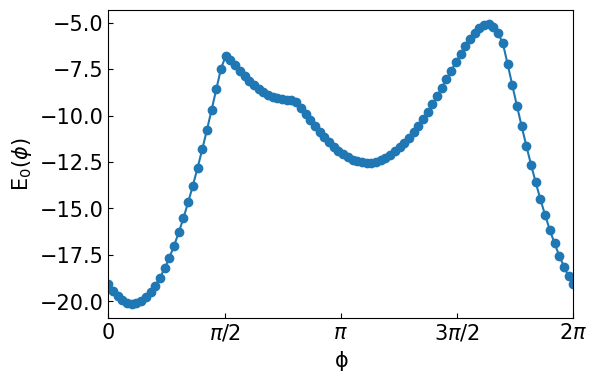

In [184]:

fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15
axes.plot(alphas,GS_energies)
axes.scatter(alphas,GS_energies)
axes.set_xlabel(r'$\mathrm{\phi}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{E_0}(\phi)$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)
axes.set_xlim([0,2*np.pi])
axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
axes.set_xticklabels(labels)

plt.show()

## Checking the observables in the different phases 

In [367]:

M_sites=[]
alphas = np.linspace(0,2*np.pi,100)
for a in alphas:
    H_= Kitaev_H(alpha=a, Js = [1.,1.,1.],J_coup = 0.0,hz=-0.42*2 ).toarray()
    E,V = eigh(H_)
    psi = V[:,0]
    E_GS = E[0]
    GS_energies.append(E_GS)
    sden = spindensity_qsl(psi,sites=[i for i in range(0,10)])
    M_sites.append(sden)

In [368]:
#Local magnetization of the site 
site = 9
Mx_alpha = [ M_sites[alpha][site][0] for alpha in range(len(alphas)) ]### alpha, site, mx-my-mz
My_alpha = [ M_sites[alpha][site][1] for alpha in range(len(alphas)) ]### alpha, site, mx-my-mz
Mz_alpha = [ M_sites[alpha][site][2] for alpha in range(len(alphas)) ]### alpha, site, mx-my-mz

[Text(0.0, 0, '$0$'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(4.71238898038469, 0, '$3\\pi/2$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

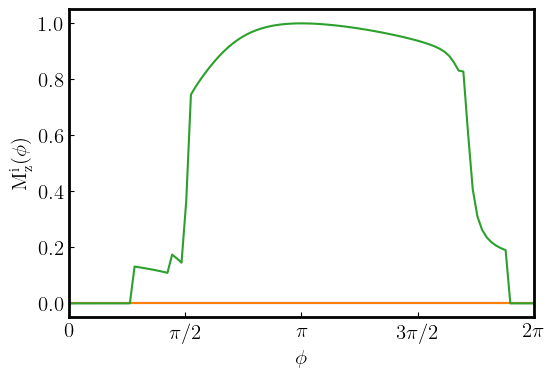

In [369]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15
plt.plot(alphas,Mx_alpha)
plt.plot(alphas,My_alpha)
plt.plot(alphas,Mz_alpha)
axes.set_xlabel(r'$\mathrm{\phi}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^i_z}(\phi)$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)
axes.set_xlim([0,2*np.pi])
axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
axes.set_xticklabels(labels)

In [370]:
# Total magnetization 
Mz_total_alpha = np.zeros(len(alphas),dtype=np.complex128)
Mx_total_alpha = np.zeros(len(alphas),dtype=np.complex128)
My_total_alpha = np.zeros(len(alphas),dtype=np.complex128)
for site in range(10):
    # Mx_alpha = [ M_sites[alpha][site][0] for alpha in range(len(alphas)) ]### alpha, site, mx-my-mz
    # My_alpha = [ M_sites[alpha][site][1] for alpha in range(len(alphas)) ]### alpha, site, mx-my-mz
    Mx_alpha = np.array([ M_sites[alpha][site][0] for alpha in range(len(alphas)) ])### alpha, site, mx-my-mz
    Mx_total_alpha += Mx_alpha 
    My_alpha = np.array([ M_sites[alpha][site][1] for alpha in range(len(alphas)) ])### alpha, site, mx-my-mz
    My_total_alpha += My_alpha 
    Mz_alpha = np.array([ M_sites[alpha][site][2] for alpha in range(len(alphas)) ])### alpha, site, mx-my-mz
    Mz_total_alpha += Mz_alpha 


[Text(0.0, 0, '$0$'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(4.71238898038469, 0, '$3\\pi/2$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

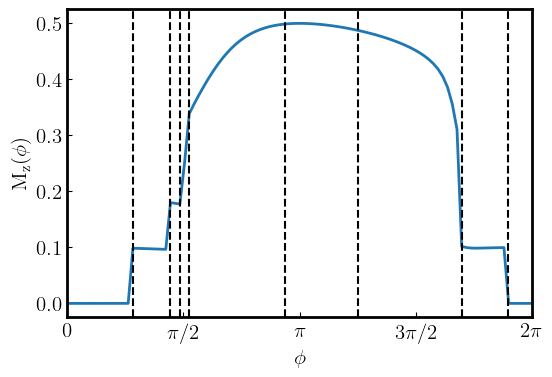

In [407]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15
/
plt.plot(alphas,Mz_total_alpha/10/2,ls='-',lw=2)
axes.set_xlabel(r'$\mathrm{\phi}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M_z}(\phi)$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)
axes.set_xlim([0,2*np.pi])
axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))


axes.axvline([np.pi/4+0.1],color='black',ls='--')
axes.axvline([np.pi/2-0.18],color='black',ls='--')
axes.axvline([np.pi/2-0.05],color='black',ls='--')
axes.axvline([np.pi/2+0.08],color='black',ls='--')

axes.axvline([np.pi-0.2],color='black',ls='--')

axes.axvline([np.pi+np.pi/4],color='black',ls='--')

axes.axvline([3*np.pi/2+0.62],color='black',ls='--')

axes.axvline([3*np.pi/2+1.25],color='black',ls='--')


labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
axes.set_xticklabels(labels)

In [467]:

M_sites_B_0=[]
M_sites_B_pi=[]
M_sites_B_pidiv2=[]
M_sites_B_3pidiv2=[]
Magn = np.linspace(0.,2,200)
for h in Magn:
    H_0= Kitaev_H(alpha=0., Js = [1.,1.,1.],J_coup = 0.0,hz=-h )#.toarray()
    H_pi= Kitaev_H(alpha=np.pi, Js = [1.,1.,1.],J_coup = 0.0,hz=-h )#.toarray()
    H_pidiv2= Kitaev_H(alpha=np.pi/2, Js = [1.,1.,1.],J_coup = 0.0,hz=-h )#.toarray()
    H_3pidiv2= Kitaev_H(alpha=3*np.pi/2, Js = [1.,1.,1.],J_coup = 0.0,hz=-h )#.toarray()
    # E,V = eigh(H_0)
    # psi_0 = V[:,0]
    E,V = H_0.eigsh(k=1,which='SA') 
    psi_0 =V[:,0]
    sden = spindensity_qsl(psi_0,sites=[i for i in range(0,10)])
    M_sites_B_0.append(sden)


    E,V = H_pi.eigsh(k=1,which='SA') 
    psi_pi =V[:,0]
    # E,V = eigh(H_pi)
    # psi_pi = V[:,0]
    sden = spindensity_qsl(psi_pi,sites=[i for i in range(0,10)])
    M_sites_B_pi.append(sden)

    E,V = H_pidiv2.eigsh(k=1,which='SA') 
    psi_pidiv2 =V[:,0]
    # E,V = eigh(H_pidiv2)
    # psi_pidiv2 = V[:,0]
    sden = spindensity_qsl(psi_pidiv2,sites=[i for i in range(0,10)])
    M_sites_B_pidiv2.append(sden)

    E,V = H_3pidiv2.eigsh(k=1,which='SA') 
    psi_3pidiv2 =V[:,0]
    # E,V = eigh(H_3pidiv2)
    # psi_3pidiv2 = V[:,0]
    sden = spindensity_qsl(psi_3pidiv2,sites=[i for i in range(0,10)])
    M_sites_B_3pidiv2.append(sden)

In [468]:
# Mx_alpha = [ M_sites_B[alpha][site][0] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
# My_alpha = [ M_sites_B[alpha][site][1] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
Mz_0 = [ M_sites_B_0[alpha][site][2] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
Mz_pi = [ M_sites_B_pi[alpha][site][2] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
Mz_pidiv2 = [ M_sites_B_pidiv2[alpha][site][2] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
Mz_3pidiv2 = [ M_sites_B_3pidiv2[alpha][site][2] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
Mz_total_0 = np.zeros(len(Magn),dtype=np.complex128)
Mz_total_pi = np.zeros(len(Magn),dtype=np.complex128)
Mz_total_pidiv2 = np.zeros(len(Magn),dtype=np.complex128)
Mz_total_3pidiv2 = np.zeros(len(Magn),dtype=np.complex128)
# Mx_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
#My_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
for site in range(10):
    Mz_0 = np.array([ M_sites_B_0[alpha][site][2] for alpha in range(len(Magn)) ])### alpha, site, mx-my-mz
    Mz_pi = np.array([ M_sites_B_pi[alpha][site][2] for alpha in range(len(Magn)) ])### alpha, site, mx-my-mz
    Mz_pidiv2 = np.array([ M_sites_B_pidiv2[alpha][site][2] for alpha in range(len(Magn)) ])### alpha, site, mx-my-mz
    Mz_3pidiv2 = np.array([ M_sites_B_3pidiv2[alpha][site][2] for alpha in range(len(Magn)) ])### alpha, site, mx-my-mz
    Mz_total_0 += Mz_0 
    Mz_total_pi += Mz_pi
    Mz_total_pidiv2 += Mz_pidiv2
    Mz_total_3pidiv2 += Mz_3pidiv2 

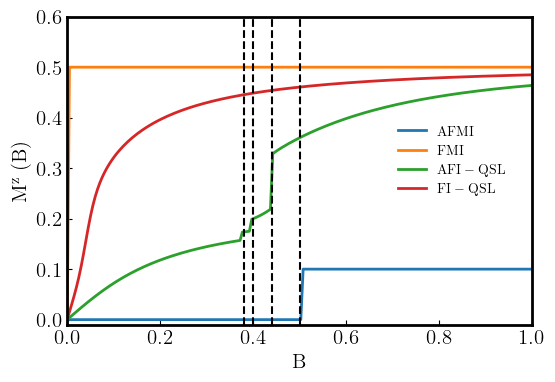

In [469]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15
Magn = np.linspace(0.,2,200)
#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')
plt.plot(Magn*1/2,Mz_total_0/10/2,ls='-',lw=2,label=r'$\mathrm{AFMI}$')
plt.plot(Magn*1/2,Mz_total_pi/10/2,ls='-',lw=2,label=r'$\mathrm{FMI}$')
plt.plot(Magn*1/2,Mz_total_pidiv2/10/2,ls='-',lw=2,label=r'$\mathrm{AFI-QSL}$')
plt.plot(Magn*1/2,Mz_total_3pidiv2/10/2,ls='-',lw=2,label=r'$\mathrm{FI-QSL}$')
axes.set_xlabel(r'$\mathrm{B}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^z\ (B)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)
axes.axvline([0.38],color='black',ls='--')
axes.axvline([0.4],color='black',ls='--')
axes.axvline([0.44],color='black',ls='--')
axes.axvline([0.5],color='black',ls='--')
axes.set_xlim([0.,1])
axes.set_ylim([-0.01,0.6])
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))

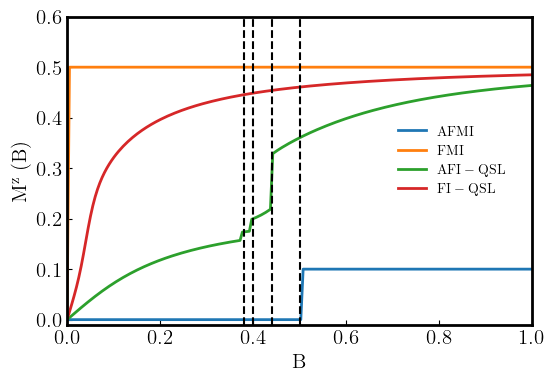

In [357]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15
Magn = np.linspace(0.,2,200)
#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')
plt.plot(Magn*1/2,Mz_total_0/10/2,ls='-',lw=2,label=r'$\mathrm{AFMI}$')
plt.plot(Magn*1/2,Mz_total_pi/10/2,ls='-',lw=2,label=r'$\mathrm{FMI}$')
plt.plot(Magn*1/2,Mz_total_pidiv2/10/2,ls='-',lw=2,label=r'$\mathrm{AFI-QSL}$')
plt.plot(Magn*1/2,Mz_total_3pidiv2/10/2,ls='-',lw=2,label=r'$\mathrm{FI-QSL}$')
axes.set_xlabel(r'$\mathrm{B}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^z\ (B)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)
axes.axvline([0.38],color='black',ls='--')
axes.axvline([0.4],color='black',ls='--')
axes.axvline([0.44],color='black',ls='--')
axes.axvline([0.5],color='black',ls='--')
axes.set_xlim([0.,1])
axes.set_ylim([-0.01,0.6])
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))

In [464]:

M_sites_B_3pidiv2_2=[]
Magn = np.linspace(0.,0.6,200)
for h in Magn:
    H_3pidiv2_2= Kitaev_H(alpha=3*np.pi/2, Js = [1.,1.,1.],J_coup = 0.0,hz=-h )#.toarray()
    # E,V = eigh(H_3pidiv2_2)
    # psi_3pidiv2_2 = V[:,0]
    E,V = H.eigsh(k=1,which='SA') 
    psi =V[:,0]
    sden = spindensity_qsl(psi_3pidiv2_2,sites=[i for i in range(0,10)])
    M_sites_B_3pidiv2_2.append(sden)
    #print(h)

In [465]:

Mz_3pidiv2_2 = [ M_sites_B_3pidiv2_2[alpha][site][2] for alpha in range(len(Magn)) ]### alpha, site, mx-my-mz
Mz_total_3pidiv2_2 = np.zeros(len(Magn),dtype=np.complex128)
# Mx_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
#My_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
for site in range(10):
    Mz_3pidiv2_2 = np.array([ M_sites_B_3pidiv2[alpha][site][2] for alpha in range(len(Magn)) ])### alpha, site, mx-my-mz
    Mz_total_3pidiv2_2 += Mz_3pidiv2_2 

/home/jalil/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


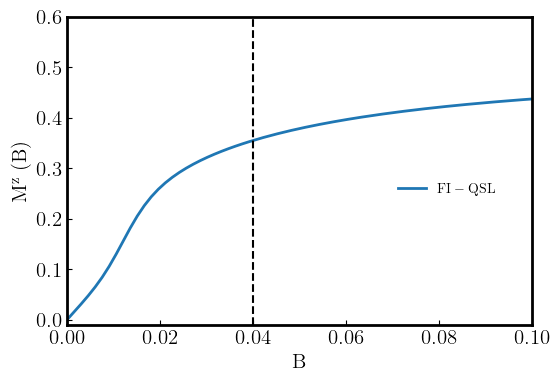

In [466]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')
plt.plot(Magn*1/2,Mz_total_3pidiv2/10/2,ls='-',lw=2,label=r'$\mathrm{FI-QSL}$')
axes.set_xlabel(r'$\mathrm{B}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^z\ (B)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axes.set_xlim([0.,0.1])
axes.set_ylim([-0.01,0.6])
axes.axvline([0.04],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))

## Evolution with the Quench

In [436]:
#### Function to evolve the system 
import scipy.linalg as la
import scipy.sparse.linalg as sla

def evolve(H_static, H_dynamic, psi, dt, method='diag', time_dep=0):
    """a function to evolve the wave function in time
    if time independet, we return Ut and should be called outside
    the loop
    """
    size = H_static.shape[0]
    if method == 'gpu' or method == 'CN_gpu':
        import pycuda.gpuarray as gpuarray
        import pycuda.autoinit
#         from skcuda import linalg
#         from skcuda import misc
#         linalg.init()
    if not time_dep:
        if method=='expm': 
            Ut = la.expm(-1j*H_static.toarray()*dt/HBAR)
            return Ut
        elif method=='eig_vec':
            w,v = la.eigh(H_static.toarray())
            Ut = np.asarray([np.exp(-1j*w[i]*dt) for i in range(size)])
            return Ut
        elif method=='CN':
#             Ut = sla.inv((eye(size) + 1j*dt*H_static/(2*HBAR)).tocsc()) @ \
#                        (eye(size) - 1j*dt*H_static/(2*HBAR))
            Ut = la.inv(( np.eye(size) + 1j*dt*H_static/(2*HBAR))) @ \
                       ( np.eye(size) - 1j*dt*H_static/(2*HBAR))
            return Ut@psi
            
        elif method=='CN_spilu':
            B = sla.spilu(eye(size) + 1j*dt*H_static/(2*HBAR))
            return B
    
        elif method=='CN_gpu':
            mat      = (eye(size) + 1j*dt*H_static/(2*HBAR))
            a_gpu    = gpuarray.to_gpu(mat.toarray()) 
            ainv_gpu = linalg.inv(a_gpu, overwrite=True)
            mat_inv  = ainv_gpu.get()
            Ut       = mat_inv @ (eye(size) - 1j*dt*H_static/(2*HBAR))
            return Ut
    else: 
        if method=='expm': 
            Ht = H_static + H_dynamic
            Ut = la.expm(-1j*Ht.toarray()*dt/HBAR)
            psi_new = Ut @ psi
            return psi

        elif method=='CN':
            Ht = H_static + H_dynamic
            Ut = sla.inv(eye(size) + 1j*dt*Ht/(2*HBAR)) @ \
                        (eye(size) - 1j*dt*Ht/(2*HBAR))
            psi = Ut @ psi
            return psi
            
        if method=='eig_vec':
            Ht = H_static + H_dynamic
            w, v = la.eigh(Ht.toarray())
            Ut = np.asarray([np.exp(-1j*w[i]*dt) for i in range(2)])
            cn = [v[:,i].conj() @ psi for i in range(2)]
            psi = np.sum([cn[i] * (Ut[i] * v[:,i]) for i in range(2)], axis=0)
            return psi

        elif method=='CN_gpu':
            Ht = H_static + H_dynamic
            mat      = (eye(size) + 1j*dt*Ht/(2*HBAR))
            a_gpu    = gpuarray.to_gpu(mat.toarray()) 
            ainv_gpu = linalg.inv(a_gpu, overwrite=True)
            mat_inv  = ainv_gpu.get()
            Ut       = mat_inv @ (eye(size) - 1j*dt*Ht/(2*HBAR))
            psi = Ut @ psi
            return psi



In [454]:
times = np.arange(0,100,0.1)
len(times)

1000

In [12]:
### Way to evolve the system using the Quspin code 
from quspin.tools.evolution import expm_multiply_parallel
### Parameters of the evolution 
#T = 100 # Total time of the evolution 

def evol_spin_phase(alpha, hz, T=5,t_break =0.1,t_step = 0.01):
    times = np.arange(0,T,t_step)
    # Compute the initial hamiltoninan in the Quspin basis 
    H =  Kitaev_H(alpha=alpha, Js = [1.,1.,1.],J_coup = 0.0,hz=hz )
    H1 = Kitaev_H(alpha=alpha, Js= [1.,1.,1.], J_coup= 0.0, hz = 0.0) # Hamiltonian associated with the Quench
    # Calculate the initial state of the Hamiltonian 
    E,V = H.eigsh(k=1,which='SA') 
    psi =V[:,0]
    # To make it more efficient we can preallocate the arrays observables. For the moment we are going to ignore this step 
    # Nos we can contruct the piece-wise Unitary evolution for the initial state 
    expH0 = expm_multiply_parallel(H.tocsr(),a=-1j*t_step, dtype = np.complex128)
    expH1 = expm_multiply_parallel(H1.tocsr(), a =-1j*t_step, dtype = np.complex128)
    # Now we calculate the time evolution using the unitary operators 
    sd_t = []
    for t in times:
        #We apply the unitary operator to the state, and start to evolve it 
        if t <= t_break:
            expH0.dot(psi,overwrite_v = True)
            ## Now, we measure the spin densities 
            sd = spindensity_qsl(psi = psi, sites = [0,1,2,3,4,5,6,7,8,9] )
            sd_t.append(sd)
        else:
            expH1.dot(psi,overwrite_v = True)
            ## Now, we measure the spin densities 
            sd = spindensity_qsl(psi = psi, sites = [0,1,2,3,4,5,6,7,8,9] )
            sd_t.append(sd)
        #print("time step",format(t))
    return sd_t


In [518]:
hz=-0.6*2
T=5
t_break =0.1
t_step=0.01
times = np.arange(0,T,t_step)

sd_t_0=evol_spin_phase(alpha=0.0, hz=hz, T=T,t_break =t_break,t_step = t_step)
print('1')
sd_t_pidiv2=evol_spin_phase(alpha=np.pi/2, hz=hz, T=T,t_break =t_break,t_step = t_step)
print('1')
sd_t_pi=evol_spin_phase(alpha=np.pi, hz=hz, T=T,t_break =t_break,t_step = t_step)
print('1')
sd_t_3pidiv2= evol_spin_phase(alpha=3*np.pi/2, hz=hz, T=T,t_break =t_break,t_step = t_step)
print('1')

1
1
1
1


In [519]:
#Mz_0_t = [ sden_t[t][site][2] for t in range(len(times)) ]### alpha, site, mx-my-mz
#Mx_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
#My_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
Mz_total_0_t= np.zeros(len(times),dtype=np.complex128)
Mz_total_pidiv2_t= np.zeros(len(times),dtype=np.complex128)
Mz_total_pi_t= np.zeros(len(times),dtype=np.complex128)
Mz_total_3pidiv2_t= np.zeros(len(times),dtype=np.complex128)
for site in range(10):
    #print(site)
    Mz_0_t = np.array([ sd_t_0[t][site][2] for t in range(len(times)) ])### alpha, site, mx-my-mz
    Mz_total_0_t += Mz_0_t 

    Mz_pidiv2_t = np.array([ sd_t_pidiv2[t][site][2] for t in range(len(times)) ])### alpha, site, mx-my-mz
    Mz_total_pidiv2_t += Mz_pidiv2_t 

    Mz_pi_t = np.array([ sd_t_pi[t][site][2] for t in range(len(times)) ])### alpha, site, mx-my-mz
    Mz_total_pi_t += Mz_pi_t 

    Mz_3pidiv2_t = np.array([ sd_t_3pidiv2[t][site][2] for t in range(len(times)) ])### alpha, site, mx-my-mz
    Mz_total_3pidiv2_t += Mz_3pidiv2_t 

/home/jalil/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


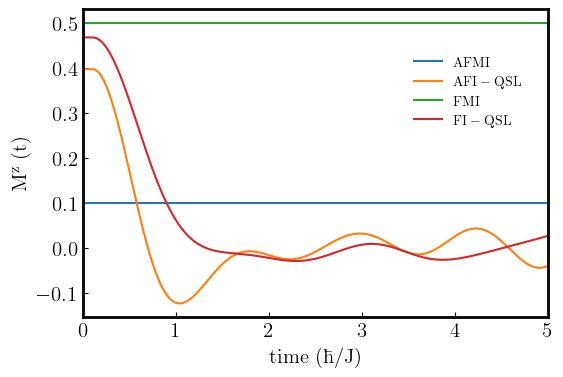

In [525]:
times = np.arange(0,T,t_step)

fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')

axes.plot(times,Mz_total_0_t/10/2,label=r'$\mathrm{AFMI}$')
axes.plot(times,Mz_total_pidiv2_t/10/2,label=r'$\mathrm{AFI-QSL}$')
axes.plot(times,Mz_total_pi_t/10/2,label=r'$\mathrm{FMI}$')
axes.plot(times,Mz_total_3pidiv2_t/10/2,label=r'$\mathrm{FI-QSL}$')
axes.set_xlabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^z\ (t)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
##axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axes.set_xlim([0.,5.])
#axes.set_ylim([-0.01,0.6])
#axes.axvline([5],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.6))

In [545]:
#plt.plot

In [495]:
sden_t = []
H_k = Kitaev_H(alpha=np.pi/2, Js = [1.,1.,1.],J_coup = 0.0,hz=-0.42 ).toarray()
E,V = eigh(H_)
psi_GS = V[:,0]
times=np.arange(0,100,0.1)
#psi_GS = psi
for t in times:
    print('time step:' , t)
    sden_save= spindensity_qsl(psi=psi_GS,sites=[0,1,2,3,4,5,6,7,8,9])
    #print(sden_save[0])
    sden_t.append(sden_save)#= #[sden_save[i] for i in range(0,9) ]
    psi_GS = evolve(H_static=H_k, H_dynamic=[], psi=psi_GS, dt=0.1, method= "CN", time_dep=0)
    if t>50:
        H_k= Kitaev_H(alpha=np.pi/2, Js = [1.,1.,1.],J_coup = 0.0,hz=0.0 ).toarray()

time step: 0.0
time step: 0.1
time step: 0.2
time step: 0.30000000000000004
time step: 0.4
time step: 0.5
time step: 0.6000000000000001
time step: 0.7000000000000001
time step: 0.8
time step: 0.9
time step: 1.0
time step: 1.1
time step: 1.2000000000000002
time step: 1.3
time step: 1.4000000000000001
time step: 1.5
time step: 1.6
time step: 1.7000000000000002
time step: 1.8
time step: 1.9000000000000001
time step: 2.0
time step: 2.1
time step: 2.2
time step: 2.3000000000000003
time step: 2.4000000000000004
time step: 2.5
time step: 2.6
time step: 2.7
time step: 2.8000000000000003
time step: 2.9000000000000004
time step: 3.0
time step: 3.1
time step: 3.2
time step: 3.3000000000000003
time step: 3.4000000000000004
time step: 3.5
time step: 3.6
time step: 3.7
time step: 3.8000000000000003
time step: 3.9000000000000004
time step: 4.0
time step: 4.1000000000000005
time step: 4.2
time step: 4.3
time step: 4.4
time step: 4.5
time step: 4.6000000000000005
time step: 4.7
time step: 4.80000000000

In [496]:
#Mz_0_t = [ sden_t[t][site][2] for t in range(len(times)) ]### alpha, site, mx-my-mz
#Mx_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
#My_total_alpha = np.zeros(len(Magn),dtype=np.complex128)
Mz_total_0_t= np.zeros(len(times),dtype=np.complex128)
for site in range(10):
    Mz_0_t = np.array([ sden_t[t][site][2] for t in range(len(times)) ])### alpha, site, mx-my-mz
    Mz_total_0_t += Mz_0_t 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


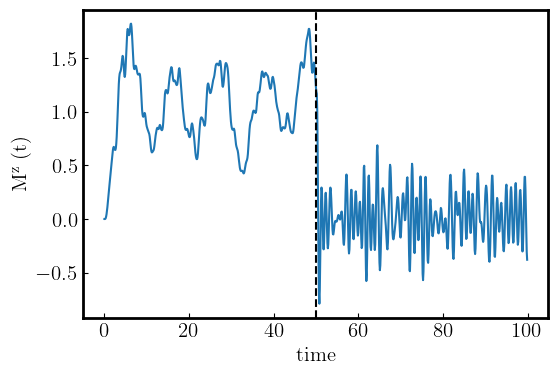

In [497]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')

axes.plot(times,Mz_total_0_t)
axes.set_xlabel(r'$\mathrm{time}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^z\ (t)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
##axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

#axes.set_xlim([0.,0.1])
#axes.set_ylim([-0.01,0.6])
axes.axvline([50],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))

## Testing pumping in the QSL as replace for the Quench dynamics 

In [268]:
%reset -f

In [146]:
### System
# Parameters
Lx, Ly = 9,2#5, 2# linear dimension of spin 1 2d lattice
N2d = Lx*Ly  #number of sites for spin 1/2
basis = spin_basis_general(N2d,pauli=1)
no_checks = dict(check_symm=False,check_herm=False,check_pcon=False)
HBAR = 0.658211928e0
J=1
#hz =0.1
alpha = np.pi/2#np.pi#0.0#np.pi/2 #0.0#np.pi/2#0.0#np.pi#0.0#np.pi/2#0.0#(np.pi-Ferro) (0--Antiferro)-- (pi/2--QSL Antiferro)--(3pi/2--QSL-Ferro )
### Hamiltonian
Js=[J,J,J]
Jxx,Jyy,Jzz = Js                                ### Magnitude of the coupling 
# Configugarion 5x2 npbc
h0 = np.sin(alpha)+np.cos(alpha)
h1 = np.cos(alpha)
##### define periodic drive #####
Omega = 2.5 # driven frequency (IS Fas)
phi = np.pi/4 ## Angle of rotation
x_proj = np.sin(phi)
y_proj = np.sin(phi)
z_proj = np.cos(phi)
def drive_x(t,Omega):
	return np.cos(Omega*t)*x_proj#*np.sin(phi)
def drive_y(t,Omega):
    return np.sin(Omega*t)*y_proj
drive_x_args=[Omega]
drive_y_args=[Omega]
## 9x2=18 configuration
J_yy = [[Jyy*h0,0,1],[Jyy*h0,2,3],[Jyy*h0,4,5],[Jyy*h0,6,7],[Jyy*h0,10,11],[Jyy*h0,12,13],[Jyy*h0,14,15],[Jyy*h0,16,17] ]
J_xx = [[Jxx*h0,1,2],[Jxx*h0,3,4],[Jxx*h0,5,6],[Jxx*h0,7,8],[Jxx*h0,9,10],[Jxx*h0,11,12],[Jxx*h0,13,14],[Jxx*h0,15,16] ]
J_zz = [[Jzz*h0,0,9],[Jzz*h0,2,11],[Jzz*h0,4,13],[Jzz*h0,6,15],[Jzz*h0,8,17]]
# operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
# # Contain the Heinsenberg elements of each coupling 
J_yxx = [[Jxx*h1,0,1],[Jxx*h1,2,3],[Jxx*h1,4,5],[Jxx*h1,6,7],[Jxx*h1,10,11],[Jxx*h1,12,13],[Jxx*h1,14,15],[Jxx*h1,16,17] ]
J_yzz = [[Jzz*h1,0,1],[Jzz*h1,2,3],[Jzz*h1,4,5],[Jzz*h1,6,7],[Jzz*h1,10,11],[Jzz*h1,12,13],[Jzz*h1,14,15],[Jzz*h1,16,17] ]
J_xyy = [[Jyy*h1,1,2],[Jyy*h1,3,4],[Jyy*h1,5,6],[Jyy*h1,7,8],[Jyy*h1,9,10],[Jyy*h1,11,12],[Jyy*h1,13,14],[Jyy*h1,15,16] ]
J_xzz = [[Jzz*h1,1,2],[Jzz*h1,3,4],[Jzz*h1,5,6],[Jzz*h1,7,8],[Jzz*h1,9,10],[Jzz*h1,11,12],[Jzz*h1,13,14],[Jzz*h1,15,16] ]
J_zxx = [[Jxx*h1,0,9],[Jxx*h1,2,11],[Jxx*h1,4,13],[Jxx*h1,6,15],[Jxx*h1,8,17]]
J_zyy = [[Jyy*h1,0,9],[Jyy*h1,2,11],[Jyy*h1,4,13],[Jyy*h1,6,15],[Jyy*h1,8,17]]

# ## 5x2 configuration
# J_yy = [[Jyy*h0,0,1],[Jyy*h0,2,3],[Jyy*h0,6,7],[Jyy*h0,8,9]]
# J_xx = [[Jxx*h0,1,2],[Jxx*h0,3,4],[Jxx*h0,5,6],[Jxx*h0,7,8]]
# J_zz = [[Jzz*h0,5,0],[Jzz*h0,2,7],[Jzz*h0,4,9]]
# #operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
# # Contain the Heinsenberg elements of each coupling 
# J_yxx = [[Jxx*h1,0,1],[Jxx*h1,2,3],[Jxx*h1,6,7],[Jxx*h1,8,9]]
# J_yzz = [[Jzz*h1,0,1],[Jzz*h1,2,3],[Jzz*h1,6,7],[Jzz*h1,8,9]]
# J_xyy = [[Jyy*h1,1,2],[Jyy*h1,3,4],[Jyy*h1,5,6],[Jyy*h1,7,8]]
# J_xzz = [[Jzz*h1,1,2],[Jzz*h1,3,4],[Jzz*h1,5,6],[Jzz*h1,7,8]]
# J_zxx = [[Jxx*h1,5,0],[Jxx*h1,2,7],[Jxx*h1,4,9]]
# J_zyy = [[Jyy*h1,5,0],[Jyy*h1,2,7],[Jyy*h1,4,9]]
# operator_list_1 = [["xx",J_zxx],["yy",J_zyy],
#                   ["xx",J_yxx],["zz",J_yzz],
#                   ["yy",J_xyy],["zz",J_xzz]]

##### construct basis in the 0-total momentum and +1-parity sector
#basis=spin_basis_1d(L=L,a=1,kblock=0,pblock=1)
#basis = spin_basis_general(L,pauli=-1)
# define PBC site-coupling lists for operators
x_field=[[x_proj,i] for i in  range(Lx*Ly)]#[4,13]]#range(Lx*Ly)]#[4,13]] #[4,13]
y_field=[[y_proj,i] for i in  range(Lx*Ly)]#[4,13]]#range(Lx*Ly)]#[4,13]]
# x_field=[[x_proj,0] ]
# y_field=[[y_proj,0] ]
z_field=[[z_proj,i] for i in range(Lx*Ly)]#[4,13]]#range(Lx*Ly)]#[4,13]]

# static and dynamic lists
static=[["xx",J_zxx],["yy",J_zyy],
          ["xx",J_yxx],["zz",J_yzz],
          ["yy",J_xyy],["zz",J_xzz],
          ["zz",J_zz],["yy",J_yy],
          ["xx",J_xx],["z",z_field]]            ## Without PBC
dynamic=[["x",x_field,drive_x,drive_x_args],["y",y_field,drive_y,drive_y_args]]
###### construct Hamiltonian
H = hamiltonian(static,dynamic,static_fmt="dia",dtype=np.complex128,basis=basis)


Hermiticity check passed!


/tmp/ipykernel_14982/1610521093.py:76: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.basis_general.spin.spin_basis_general'>, to turn off this warning set check_symm=False in hamiltonian
  H = hamiltonian(static,dynamic,static_fmt="dia",dtype=np.complex128,basis=basis)


In [147]:
## Find the eigenvalue
E,V = H.eigsh(time=0.0,k=1,which='SA') 
psi =V[:,0]
print('state:',psi,' size:',len(psi))

state: [-2.05937363e-06-7.50599784e-07j -6.12182194e-06-2.23127953e-06j
  7.01135312e-06+2.55549554e-06j ...  1.99688976e-02+7.27825686e-03j
 -4.71953278e-02-1.72017367e-02j  3.59503694e-02+1.31031781e-02j]  size: 262144


In [272]:
### Evolution of the state and the observable 
times = np.arange(0.0,10,0.1)#np.linspace(0.0,,150,endpoint=True)
#si1_t = H.expm(psi1,a=-1j,start=times[0],stop=times[-1],num=len(times) )#,block_diag=True)
psi_t = H.evolve(psi,times[0],times,verbose=True)

In [149]:
sigma_y_list = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx)]
# Time evolution of observables
sigma_y_t = np.vstack([n.expt_value(psi_t).real for n in sigma_y_list]).T

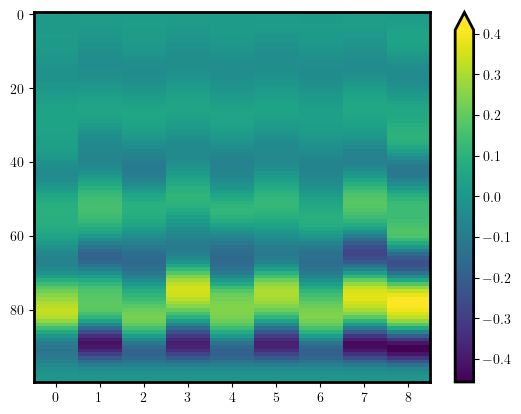

In [150]:
# Plot density dynamics
fig=plt.imshow(sigma_y_t[::-1],aspect = 'auto',interpolation=None)
plt.colorbar(fig, orientation = 'vertical',extend='max')
plt.show()
plt.close()

In [36]:
# ### Total magnetization
M_i_z = [hamiltonian([["z",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx*Ly)]
M_z = np.zeros(100)

M_i_x = [hamiltonian([["x",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx*Ly)]
M_x = np.zeros(100)

M_i_y = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx*Ly)]
M_y = np.zeros(100)
for M_i in M_i_z:
    M_z += M_i.expt_value(psi_t).real
for M_i in M_i_x:
    M_x += M_i.expt_value(psi_t).real
for M_i in M_i_y:
    M_y += M_i.expt_value(psi_t).real

In [28]:
#plt.plot(Mx**2+My**2+Mz**2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


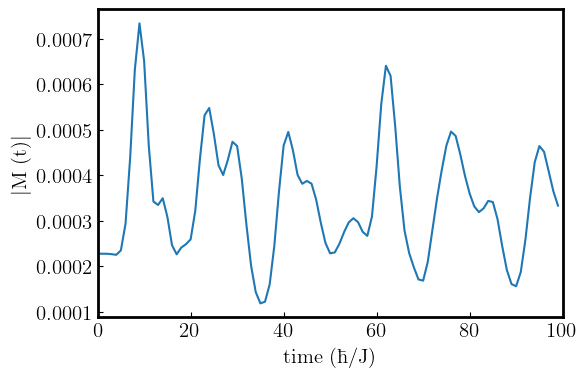

In [38]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15#plt.plot(Magn*1/2,Mx_total_alpha/10/2)

Mx=hamiltonian([["x",[[1.0,15]]]],[],basis=basis,dtype=np.complex128,**no_checks).expt_value(psi_t).real
My=hamiltonian([["y",[[1.0,15]]]],[],basis=basis,dtype=np.complex128,**no_checks).expt_value(psi_t).real
Mz=hamiltonian([["z",[[1.0,15]]]],[],basis=basis,dtype=np.complex128,**no_checks).expt_value(psi_t).real
axes.plot(Mx**2+My**2+Mz**2)
axes.set_xlabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$|\mathrm{M\ (t)}|$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
##axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axes.set_xlim([0.,100])
#axes.set_ylim([-0.1,0.1])
#axes.set_ylim([-0.01,0.6])
#axes.axvline([5],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs, loc= (0.7,  0.01))


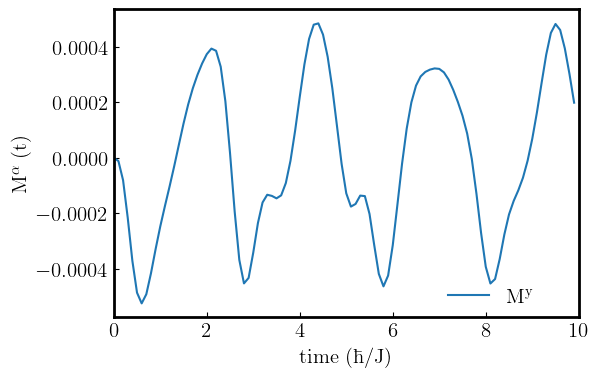

In [40]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')

#axes.plot(times,M_x/18/2,label=r'$\mathrm{M^x}$')
axes.plot(times,M_y/18/2,label=r'$\mathrm{M^y}$')
#axes.plot(times,M_z/10/2,label=r'$\mathrm{M^z}$')
#axes.plot(times,Mz_total_3pidiv2_t/10/2,label=r'$\mathrm{FI-QSL}$')
axes.set_xlabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^{\alpha}\ (t)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
##axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axes.set_xlim([0.,10.])
#axes.set_ylim([-0.1,0.1])
#axes.set_ylim([-0.01,0.6])
#axes.axvline([5],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs, loc= (0.7,  0.01))



In [151]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(sigma_y_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))

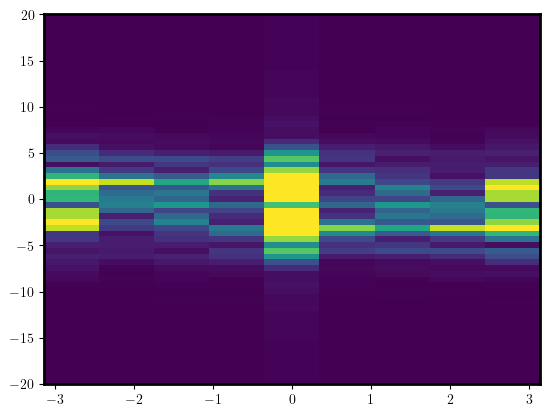

In [154]:
# Compute the exact result for the spectrum for plotting purposes
#spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,Lx)
# for i in range(L):
#     spectrum[i] = 2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# # Plot 2D Fourier transform
plt.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmax=0.2)
# plt.plot(krange,spectrum,'r-')
# plt.plot(krange,-1*spectrum,'r-')
plt.ylim(-20,20)
plt.show()
plt.close()

In [156]:
## Once the system is in the stationary regime we turn off the field 
times = np.arange(0.0,10,0.1)#np.linspace(0.0,,150,endpoint=True)
psi_new= psi_t[:,-1]#psi_t[-1]


In [157]:
## 9x2=18 configuration
J_yy = [[Jyy*h0,0,1],[Jyy*h0,2,3],[Jyy*h0,4,5],[Jyy*h0,6,7],[Jyy*h0,10,11],[Jyy*h0,12,13],[Jyy*h0,14,15],[Jyy*h0,16,17] ]
J_xx = [[Jxx*h0,1,2],[Jxx*h0,3,4],[Jxx*h0,5,6],[Jxx*h0,7,8],[Jxx*h0,9,10],[Jxx*h0,11,12],[Jxx*h0,13,14],[Jxx*h0,15,16] ]
J_zz = [[Jzz*h0,0,9],[Jzz*h0,2,11],[Jzz*h0,4,13],[Jzz*h0,6,15],[Jzz*h0,8,17]]
# operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
# # Contain the Heinsenberg elements of each coupling 
J_yxx = [[Jxx*h1,0,1],[Jxx*h1,2,3],[Jxx*h1,4,5],[Jxx*h1,6,7],[Jxx*h1,10,11],[Jxx*h1,12,13],[Jxx*h1,14,15],[Jxx*h1,16,17] ]
J_yzz = [[Jzz*h1,0,1],[Jzz*h1,2,3],[Jzz*h1,4,5],[Jzz*h1,6,7],[Jzz*h1,10,11],[Jzz*h1,12,13],[Jzz*h1,14,15],[Jzz*h1,16,17] ]
J_xyy = [[Jyy*h1,1,2],[Jyy*h1,3,4],[Jyy*h1,5,6],[Jyy*h1,7,8],[Jyy*h1,9,10],[Jyy*h1,11,12],[Jyy*h1,13,14],[Jyy*h1,15,16] ]
J_xzz = [[Jzz*h1,1,2],[Jzz*h1,3,4],[Jzz*h1,5,6],[Jzz*h1,7,8],[Jzz*h1,9,10],[Jzz*h1,11,12],[Jzz*h1,13,14],[Jzz*h1,15,16] ]
J_zxx = [[Jxx*h1,0,9],[Jxx*h1,2,11],[Jxx*h1,4,13],[Jxx*h1,6,15],[Jxx*h1,8,17]]
J_zyy = [[Jyy*h1,0,9],[Jyy*h1,2,11],[Jyy*h1,4,13],[Jyy*h1,6,15],[Jyy*h1,8,17]]
## 5x2 configuration
# J_yy = [[Jyy*h0,0,1],[Jyy*h0,2,3],[Jyy*h0,6,7],[Jyy*h0,8,9]]
# J_xx = [[Jxx*h0,1,2],[Jxx*h0,3,4],[Jxx*h0,5,6],[Jxx*h0,7,8]]
# J_zz = [[Jzz*h0,5,0],[Jzz*h0,2,7],[Jzz*h0,4,9]]
# #operator_list_0 = [["zz",J_zz],["yy",J_yy],["xx",J_xx]]
# # Contain the Heinsenberg elements of each coupling 
# J_yxx = [[Jxx*h1,0,1],[Jxx*h1,2,3],[Jxx*h1,6,7],[Jxx*h1,8,9]]
# J_yzz = [[Jzz*h1,0,1],[Jzz*h1,2,3],[Jzz*h1,6,7],[Jzz*h1,8,9]]
# J_xyy = [[Jyy*h1,1,2],[Jyy*h1,3,4],[Jyy*h1,5,6],[Jyy*h1,7,8]]
# J_xzz = [[Jzz*h1,1,2],[Jzz*h1,3,4],[Jzz*h1,5,6],[Jzz*h1,7,8]]
# J_zxx = [[Jxx*h1,5,0],[Jxx*h1,2,7],[Jxx*h1,4,9]]
# J_zyy = [[Jyy*h1,5,0],[Jyy*h1,2,7],[Jyy*h1,4,9]]
# operator_list_1 = [["xx",J_zxx],["yy",J_zyy],
#                   ["xx",J_yxx],["zz",J_yzz],
#                   ["yy",J_xyy],["zz",J_xzz]]
##### construct basis in the 0-total momentum and +1-parity sector
#basis=spin_basis_1d(L=L,a=1,kblock=0,pblock=1)
#basis = spin_basis_general(L,pauli=-1)
# define PBC site-coupling lists for operators

# static and dynamic lists
static=[["xx",J_zxx],["yy",J_zyy],
          ["xx",J_yxx],["zz",J_yzz],
          ["yy",J_xyy],["zz",J_xzz],
          ["zz",J_zz],["yy",J_yy],
          ["xx",J_xx]]            ## Without PBC
dynamics = []
H_1 = hamiltonian(static,dynamics,basis=basis,dtype=np.complex128, **no_checks)



In [158]:
psi1_t = H_1.evolve(psi_new,times[0],times,verbose=True)

evolved to time 0.0, norm of state(s) 0.9999993488795448
evolved to time 0.1, norm of state(s) 0.9999993487532728
evolved to time 0.2, norm of state(s) 0.999999345732047
evolved to time 0.30000000000000004, norm of state(s) 0.9999993427108217
evolved to time 0.4, norm of state(s) 0.9999993396895969
evolved to time 0.5, norm of state(s) 0.9999993366683727
evolved to time 0.6000000000000001, norm of state(s) 0.9999993336471492
evolved to time 0.7000000000000001, norm of state(s) 0.9999993306259262
evolved to time 0.8, norm of state(s) 0.9999993276047039
evolved to time 0.9, norm of state(s) 0.9999993245834822
evolved to time 1.0, norm of state(s) 0.9999993215622609
evolved to time 1.1, norm of state(s) 0.9999993185410402
evolved to time 1.2000000000000002, norm of state(s) 0.9999993155198204
evolved to time 1.3, norm of state(s) 0.9999993124986007
evolved to time 1.4000000000000001, norm of state(s) 0.999999309477382
evolved to time 1.5, norm of state(s) 0.9999993064561638
evolved to tim

In [159]:
sigma1_y_list = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx)]
# Time evolution of observables
sigma1_y_t = np.vstack([n.expt_value(psi1_t).real for n in sigma1_y_list]).T

In [160]:
name='space_time_AFMQSL_thetapidiv2.txt'

In [161]:
np.savetxt(name,sigma1_y_t)

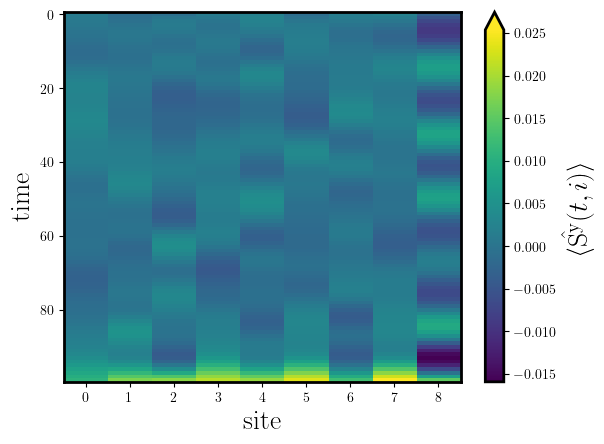

In [162]:
# Plot density dynamics
fs=20
fig=plt.imshow(sigma1_y_t[::-1],aspect = 'auto',interpolation=None)
c= plt.colorbar(fig, orientation = 'vertical',extend='max')
#plt.ylim(200,0)
c.set_label(label=r'$\langle\hat\mathrm{ S^y}(t,i) \rangle$',fontsize=fs)
plt.xlabel(r'$\mathrm{site}$',fontsize=fs)
plt.ylabel(r'$\mathrm{time}$',fontsize=fs)
#plt.legend(fontsize=fs)
plt.show()
#plt.close()

In [140]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(sigma1_y_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))


In [141]:
#np.savetxt(name+'spec',data)

/tmp/ipykernel_14982/2813490587.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))


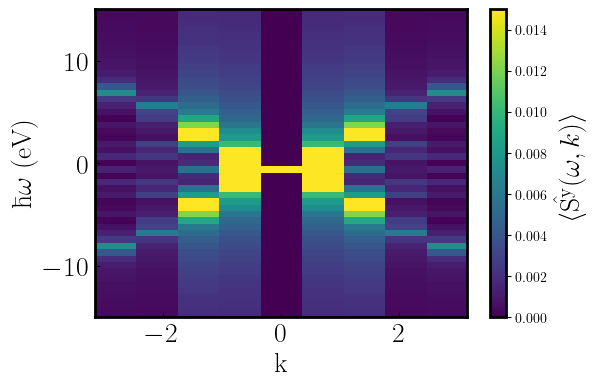

In [144]:
# Compute the exact result for the spectrum for plotting purposes
import matplotlib.colors as mcolors
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=20
# spectrum = np.zeros(L)fig,axes=plt.subplots(1,1,figsize=(6,4))
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

#axes.set_xlim([0.,0.1])
#axes.set_ylim([-0.01,0.6])
#axes.axvline([0.04],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))
krange = np.linspace(-np.pi,np.pi,Lx)
# for i in range(L):
#     spectrum[i] = 2*2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# Plot 2D Fourier transform
c= axes.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmin=0,vmax=.015)

#pcm = axes.pcolormesh(data[::-1])
#fig.colorbar(pcm, ax=axes)
cbar = fig.colorbar(c, ax=axes, orientation='vertical')
cbar.set_label(r'$\langle\hat\mathrm{ S^y}(\omega,k) \rangle$',fontsize=fs)

axes.set_xlabel(r'$\mathrm{k}$',fontsize=fs)
axes.set_ylabel(r'$\mathrm{\hbar \omega\ (eV)}$',fontsize=fs)
#c = axes.pcolormesh(kx, ky, Z_fft_magnitude.T, cmap=cmap, shading='auto', vmin=0., vmax=1e-2)
#fig.colorbar(ax=axes)
#plt.colorbar(fig,axes, orientation = 'vertical',extend='max')
# plt.plot(krange,spectrum,'r-')
# plt.plot(krange,-1*spectrum,'r-')
axes.set_ylim(-15,15)
plt.show()
#plt.close()

In [23]:
### Total magnetization
M_i_z = [hamiltonian([["z",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx*Ly)]
M_z = np.zeros(100)

M_i_x = [hamiltonian([["x",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx*Ly)]
M_x = np.zeros(100)

M_i_y = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(Lx*Ly)]
M_y = np.zeros(100)
for M_i in M_i_z:
    M_z += M_i.expt_value(psi1_t).real
for M_i in M_i_x:
    M_x += M_i.expt_value(psi1_t).real
for M_i in M_i_y:
    M_y += M_i.expt_value(psi1_t).real

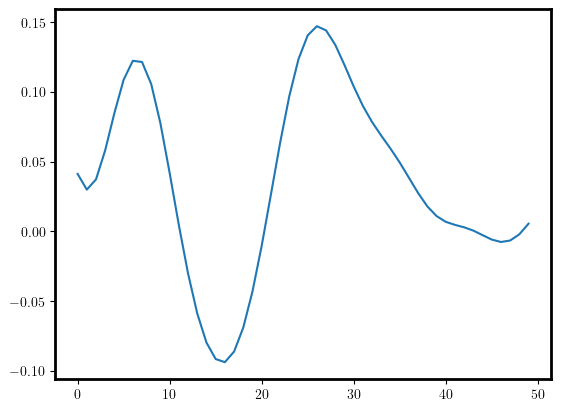

In [30]:
plt.plot(hamiltonian([["x",[[1.0,13]]]],[],basis=basis,dtype=np.complex128,**no_checks).expt_value(psi1_t).real)

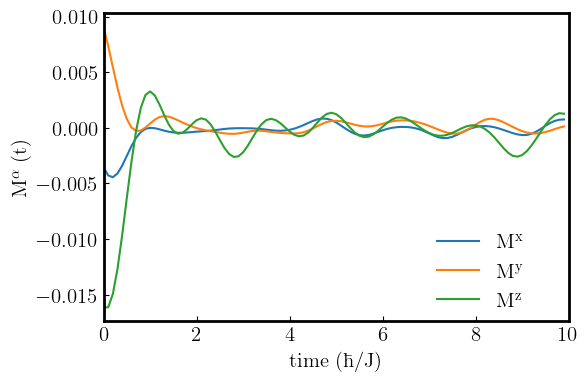

In [24]:
fig,axes=plt.subplots(1,1,figsize=(6,4))
fs=15#plt.plot(Magn*1/2,Mx_total_alpha/10/2)
#plt.plot(Magn*1/2,My_total_alpha/10/2,ls=':')

axes.plot(times,M_x/18/2,label=r'$\mathrm{M^x}$')
axes.plot(times,M_y/18/2,label=r'$\mathrm{M^y}$')
axes.plot(times,M_z/10/2,label=r'$\mathrm{M^z}$')
#axes.plot(times,Mz_total_3pidiv2_t/10/2,label=r'$\mathrm{FI-QSL}$')
axes.set_xlabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)
#axes.set_xticks(['$0$',r'$\pi/$',r'$\pi$',r'$3*\pi/2$',r'$2*\pi$'])
axes.set_ylabel(r'$\mathrm{M^{\alpha}\ (t)}$',fontsize=fs)
axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
##axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axes.set_xlim([0.,10.])
#axes.set_ylim([-0.01,0.6])
#axes.axvline([5],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs, loc= (0.7,  0.01))



# plt.plot(M_z/18)
# plt.plot(M_x/18)
# plt.plot(M_y/18)

In [45]:
## Correlation in y 
corr1_y_list = [hamiltonian([["xx",[[1.0,i,i+1]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in [1,3,5,7,9,11,13,15]]
#corr1_y_list = [hamiltonian([["xx",[[1.0,i,i+1]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in [0,2,4,6,8,10,12,14]]
# Time evolution of observables
corr1_y_t = np.vstack([n.expt_value(psi1_t).real for n in corr1_y_list]).T

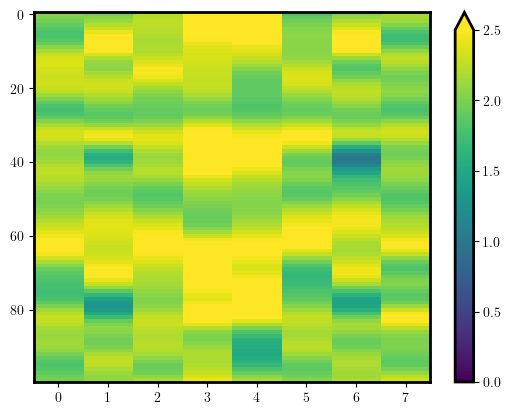

In [47]:
# Plot density dynamics
fig=plt.imshow(corr1_y_t[::-1]/np.max(corr1_y_t),aspect = 'auto',interpolation=None,vmin=0.,vmax=2.5)
plt.colorbar(fig, orientation = 'vertical',extend='max')
#plt.ylim(200,0)
plt.show()
plt.close()

In [768]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(corr1_y_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))

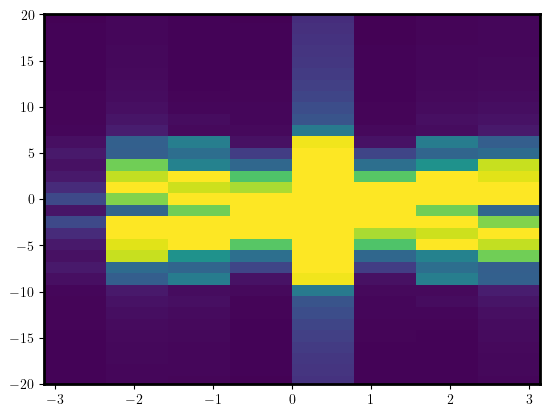

In [771]:
# Compute the exact result for the spectrum for plotting purposes
#spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,L-1)
# for i in range(L):
#     spectrum[i] = 2*2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# Plot 2D Fourier transform
plt.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmin=0,vmax=.01)
# plt.plot(krange,spectrum,'r-')
# plt.plot(krange,-1*spectrum,'r-')
plt.ylim(-20,20)
plt.show()
plt.close()

## Testing the quench spectroscopy using a transverse spin chain 


In [63]:
comb = []
J=0.1
L=10
N = 5  # Número de sitios
combinaciones = []
for i in range(N):
    for j in range(1, N):  # Iteramos sobre el desplazamiento j
        combinacion = (i, (i + j) % N)
        if combinacion[0] < combinacion[1]:  # Aseguramos que i < j
            combinaciones.append(combinacion)
print(combinaciones)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [60]:
N = 5  # Número de sitios
combinaciones = []
for i in range(N):
    for j in range(1, N):  # Solo necesitamos iterar hasta N-1 para condiciones periódicas
        combinaciones.append((i, (i + j) % N))

print(combinaciones)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (1, 0), (2, 3), (2, 4), (2, 0), (2, 1), (3, 4), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (4, 3)]


In [2]:
L=17#10#17
basis = spin_basis_general(L,pauli=-1)
no_checks = dict(check_symm=False,check_herm=False,check_pcon=False)
HBAR = 0.658211928e0
def transv_spinchain_H(L=17,J=0.1,h=0.2):#alpha = 1, S = np.zeros([3,3]) , Js = [1.0,1.0,1.0], J_coup = 1.0,hz=-0.1 ):
    '''This function computes the hamiltonian of the transverse spin chain 
    '''
    # Couplings between spin 
    # xx couplings 
    # combin = []
    # [(i, j) for i in range(L) for j in range(i + 1, L)] ### Without periodic boundary conditions 
    # ##Coupling with periodic boundary conditions
    # for i in range(L):
    #     for j in range(i + 1, L + i):  # N + i para considerar el efecto de las condiciones periódicas
    #         if i != j % L:  # Excluir combinaciones donde i y j son iguales
    #             combin.append((i, j % L))  # Usamos el operador módulo para "envolver" j
    #### without repeat
    # for i in range(L):
    #     for j in range(1, L):  # Iteramos sobre el desplazamiento j
    #         comb = (i, (i + j) % L)
    #         if comb[0] < comb[1]:  # Aseguramos que i < j
    #             combin.append(comb)
    # for i in range(L):
    #     for j in range(1, L):  # Solo necesitamos iterar hasta N-1 para condiciones periódicas
    #         combin.append((i, (i + j) % L))
    
    #Coupling including all the possible interactiona
    #J_xx = [[J,i,j] for (i,j) in combin]
    #Coupling including only NN interaction with PBC
    J_xx=[[J,i,(i+1)%L] for i in range(L)] # PBC
    # Quench operator 
    J_z = [ [h,i] for i in range(L) ]
    # compute the hamiltonian
    static= [["xx",J_xx], ["z",J_z]]
    dynamics = []
    H = hamiltonian(static,dynamics,basis=basis,dtype=np.complex128, **no_checks)
    #quantum_operator(operator_dict,basis=basis,**no_checks)
    #print(params_dict)
    #H_1 = H.tohamiltonian(params_dict)
    return  H#_1     


In [3]:
## Calculation of equal time correlation function to measure the Spectrum
def Corr_yy_op(basis=basis, sites=(0,1) ): 
    site1,site2=sites
    sigma = [["yy", [[1.0, site1,site2]]] ]
    return hamiltonian(sigma,[],
                       dtype=np.complex128,basis=basis,**no_checks)

Corr_yy_op(basis=basis, sites=(0,1) )
len(basis.states)

131072

In [4]:
## Evolution of spin tranverse chain 

def evol_spin_transv(L=17,J=-1,h=3.3 , T=2,t_break =0.5,t_step = 0.1):
    times = np.arange(0,T,t_step)
    # Compute the initial hamiltoninan in the Quspin basis 
    H =  transv_spinchain_H(L=L,J=J,h=-3.0)
    #Kitaev_H(alpha=alpha, Js = [1.,1.,1.],J_coup = 0.0,hz=hz )
    H1 = transv_spinchain_H(L=L,J=J,h=-2.6)
    #Kitaev_H(alpha=alpha, Js= [1.,1.,1.], J_coup= 0.0, hz = 0.0) # Hamiltonian associated with the Quench
    # Calculate the initial state of the Hamiltonian 
    E,V = H.eigsh(k=1,which='SA') 
    psi =V[:,0]
    # To make it more efficient we can preallocate the arrays observables. For the moment we are going to ignore this step 
    # Nos we can contruct the piece-wise Unitary evolution for the initial state 
    expH0 = expm_multiply_parallel(H.tocsr(),a=-1j*t_step, dtype = np.complex128)
    expH1 = expm_multiply_parallel(H1.tocsr(), a =-1j*t_step, dtype = np.complex128)
    # Now we calculate the time evolution using the unitary operators and we save the spin correlations
    #sd_t = []
    corr_t = []
    for t in times:
        #We apply the unitary operator to the state, and start to evolve it 
        if t <= t_break:
            expH0.dot(psi,overwrite_v = True)
            for R in range(L):
                ## Now, we measure the spin densities 
                corr = Corr_yy_op(sites=(R,(L-1)//2 )).expt_value(V = psi)#.toarray()
                #spindensity_qsl(psi = psi, sites = [0,1,2,3,4,5,6,7,8,9] )
                #corr = corr.copy()
                #print(corr)
                corr_t.append(corr)
                #print("site ",format(R))
        else:
            expH1.dot(psi,overwrite_v = True)
            for R in range(L):
                ## Now, we measure the spin densities 
                corr = Corr_yy_op(sites=(R,(L-1)//2 )).expt_value(V = psi)
                #(psi = psi, sites = [0,1,2,3,4,5,6,7,8,9] )
                #corr = corr.copy()
                #print(corr)
                corr_t.append(corr)
                #print("site ",format(R))
        print("time step",round(t,2))
    return corr_t

In [734]:
test = evol_spin_transv(L=17,J=-1,h=3.3 , T=20,t_break =0.1,t_step = 0.01)

time step 0.0
time step 0.01
time step 0.02
time step 0.03
time step 0.04
time step 0.05
time step 0.06
time step 0.07
time step 0.08
time step 0.09
time step 0.1
time step 0.11
time step 0.12
time step 0.13
time step 0.14
time step 0.15
time step 0.16
time step 0.17
time step 0.18
time step 0.19
time step 0.2
time step 0.21
time step 0.22
time step 0.23
time step 0.24
time step 0.25
time step 0.26
time step 0.27
time step 0.28
time step 0.29
time step 0.3
time step 0.31
time step 0.32
time step 0.33
time step 0.34
time step 0.35
time step 0.36
time step 0.37
time step 0.38
time step 0.39
time step 0.4
time step 0.41
time step 0.42
time step 0.43
time step 0.44
time step 0.45
time step 0.46
time step 0.47
time step 0.48
time step 0.49
time step 0.5
time step 0.51
time step 0.52
time step 0.53
time step 0.54
time step 0.55
time step 0.56
time step 0.57
time step 0.58
time step 0.59
time step 0.6
time step 0.61
time step 0.62
time step 0.63
time step 0.64
time step 0.65
time step 0.66
ti

In [682]:
# test

In [784]:
t_step=0.01#0.1#0.1
T=5.0#1.5
L=17
times = np.arange(0.0,T,t_step)
test_1 = np.zeros([L,len(times)], dtype=np.complex128)
#np.shape(np.zeros([17,20]))
j=0
for t in range(len(times)):
    for R in range(L):
        test_1[R,t] = test[j]
        j=j+1
        

In [785]:
test_2 = np.real(test_1)
np.shape(test_2)

(17, 500)

In [786]:
test_2#[-1]

array([[-2.35775378e-06, -2.35775378e-06, -2.35775378e-06, ...,
        -2.97840326e-04, -5.75639359e-04, -8.27166046e-04],
       [-6.96818371e-06, -6.96818371e-06, -6.96818371e-06, ...,
         5.18203869e-03,  5.24690816e-03,  5.23583224e-03],
       [-2.61363021e-05, -2.61363021e-05, -2.61363021e-05, ...,
        -1.73872648e-03, -1.70314386e-03, -1.58961887e-03],
       ...,
       [-2.61363021e-05, -2.61363021e-05, -2.61363021e-05, ...,
        -1.73872648e-03, -1.70314386e-03, -1.58961887e-03],
       [-6.96818372e-06, -6.96818372e-06, -6.96818371e-06, ...,
         5.18203869e-03,  5.24690816e-03,  5.23583224e-03],
       [-2.35775378e-06, -2.35775378e-06, -2.35775378e-06, ...,
        -2.97840326e-04, -5.75639359e-04, -8.27166046e-04]])

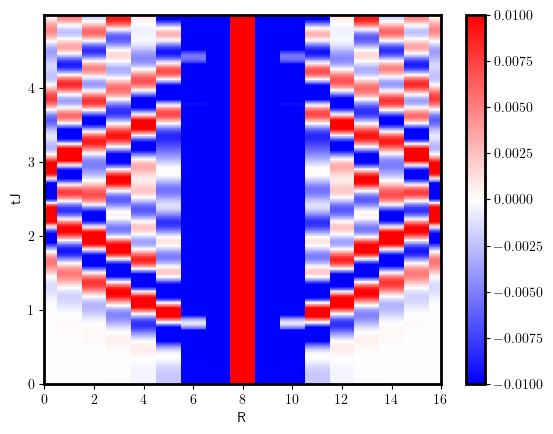

In [787]:
#plt.plot(test)
import matplotlib.colors as mcolors
tJ = np.arange(0.0,5.0,0.01)#np.linspace(0, 2, )  # Eje y
R = np.arange(0,L,1)#np.linspace(0, 15, 50)  # Eje x
tJ, R = np.meshgrid(tJ, R)
Z = test_2#np.sin(tJ) * np.cos(R)  # Ejemplo de función para el colormap
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'],N=256)


fig, ax = plt.subplots()
c = ax.pcolormesh(R, tJ, Z/np.max(Z), cmap=cmap, shading='auto', vmin=-1e-2, vmax=1e-2)
fig.colorbar(c, ax=ax)

# Personalizar etiquetas
ax.set_xlabel('R')
ax.set_ylabel('tJ')

# Añadir líneas y otros elementos
# ax.plot([0, 15], [0, 2.5], 'g-')  # Línea verde
# ax.plot([5, 10], [1.25, 1.25], 'b--')  # Línea azul punteada
plt.xlim(0,L-1)
plt.show()


In [788]:
from scipy import fftpack

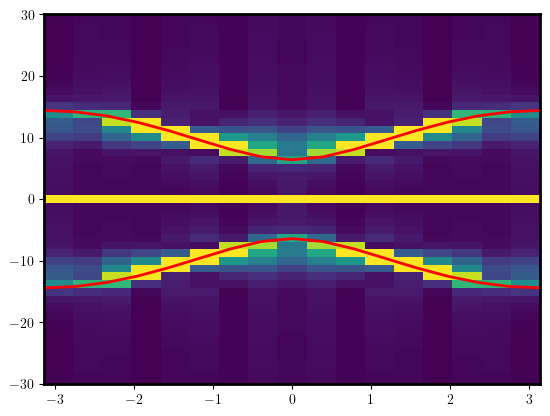

In [837]:
#Z_fft_magnitude.find('Nan')
# R.shape
# R[0, 1] - R[0, 0]
# tJ.shape

# #np.fft.fftshift(np.fft.fftfreq(300, 0.01))
# #len(np.fft.fftshift(np.fft.fftfreq(19, 1)))
# #R.shape[1]
# # #tJ.shape[0]
# # kx = np.fft.fftshift(np.fft.fftfreq(R.shape[1], R[0, 1] - R[0, 0]))
# # kx

# #np.fft.fftfreq(19, 1)
# #np.fft.fftfreq(300, 0.01)
# np.max(Z_fft_magnitude)
# np.max(Z_fft)

# R[1, 0] - R[0, 0]
# tJ[0, 1] - tJ[0, 0]


steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(Z, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))
h=-2.6*2
J0=-1*2

spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,L)
for i in range(L):
    spectrum[i] = 2*np.sqrt(h**2+J0**2-2*h*J0*np.cos(krange[i]))

plt.imshow(data[::].T, aspect = 'auto', interpolation = 'none',vmin=0.0, vmax=1e-2 ,extent = (-np.pi, np.pi, max(energies)/1, min(energies)/1) )
plt.plot(krange,spectrum,'r-',lw=2.)
plt.plot(krange,-1*spectrum,'r-',lw=2.)
plt.ylim(-30,30)
plt.show()
plt.close()

In [838]:
#plt.plot(data[::-1])

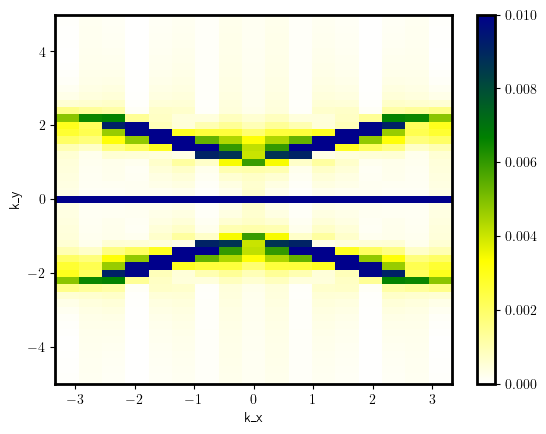

In [850]:
# Aplicar la transformada de Fourier
Z_fft = np.fft.fft2(Z)
Z_fft = np.fft.fftshift(Z_fft)  # Shift para centrar las frecuencias bajas
Z_fft_magnitude = np.abs(Z_fft)/np.max(np.abs(Z_fft))#np.abs(Z_fft)  # Magnitud de la transformada de Fourier

# Crear las frecuencias correspondientes
kx = np.linspace(-np.pi,np.pi,17)
#np.fft.fftshift(np.fft.fftfreq(R.shape[1], R[1, 0] - R[0, 0]))
ky =np.fft.fftshift(np.fft.fftfreq(500, 0.01))
kx, ky = np.meshgrid(kx, ky)


# Crear un colormap personalizado con más valores interpolados
colors = ['white','yellow','green','darkblue']#['blue', 'white', 'red']
n_colors = 256*10  # Aumentar el número de colores interpolados
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_colors)


fig, ax = plt.subplots()
c = ax.pcolormesh(kx, ky, Z_fft_magnitude.T, cmap=cmap, shading='auto', vmin=0., vmax=1e-2)
fig.colorbar(c, ax=ax)

# Personalizar etiquetas
ax.set_xlabel('k_x')
ax.set_ylabel('k_y')
ax.set_ylim(-5.,5.)
#ax.set_xlim(-0.3,0.3)

plt.show()

#np.isnan(Z_fft_magnitude).any()

In [7]:
### Local quench 
## Parameters
J=-1
h=-2.6
L=17
# Observable is local
n_list = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(L)]
# Define initial state as superposition of two product states in the Hilbert space
# (This is equivalent to the spin rotation, but it's easier to do it like this in the ED code.)
st = "".join("1" for i in range(L//2)) + "0" + "".join("1" for i in range(L//2)) ### Spin flip of a Ferro state
iDH = basis.index(st) ### Identification
st_0 = "".join("1" for i in range(L)) ### Ferro state
i0 = basis.index(st_0) ### Identification
psi1 = np.zeros(basis.Ns)
psi1[i0] = np.sqrt(0.5)
psi1[iDH] = np.sqrt(0.5)

H =  transv_spinchain_H(L=L,J=J,h=h)

### Evolution of the state and the observable 
times = np.arange(0.0,5.0,0.01)#np.linspace(0.0,,150,endpoint=True)

#si1_t = H.expm(psi1,a=-1j,start=times[0],stop=times[-1],num=len(times) )#,block_diag=True)
si1_t = H.evolve(psi1,times[0],times,verbose=True)

evolved to time 0.0, norm of state(s) 1.0
evolved to time 0.01, norm of state(s) 0.9999999999947027
evolved to time 0.02, norm of state(s) 0.9999999999894066
evolved to time 0.03, norm of state(s) 0.9999999999841084
evolved to time 0.04, norm of state(s) 0.999999999978811
evolved to time 0.05, norm of state(s) 0.9999999999735143
evolved to time 0.06, norm of state(s) 0.9999999999682172
evolved to time 0.07, norm of state(s) 0.9999999999629197
evolved to time 0.08, norm of state(s) 0.9999999999576223
evolved to time 0.09, norm of state(s) 0.9999999999523251
evolved to time 0.1, norm of state(s) 0.9999999999470276
evolved to time 0.11, norm of state(s) 0.9999999999417307
evolved to time 0.12, norm of state(s) 0.9999999999364331
evolved to time 0.13, norm of state(s) 0.9999999999311355
evolved to time 0.14, norm of state(s) 0.9999999999258378
evolved to time 0.15, norm of state(s) 0.9999999999205407
evolved to time 0.16, norm of state(s) 0.9999999999152427
evolved to time 0.17, norm of st

In [8]:
# Time evolution of observables
n_t = np.vstack([n.expt_value(si1_t).real for n in n_list]).T

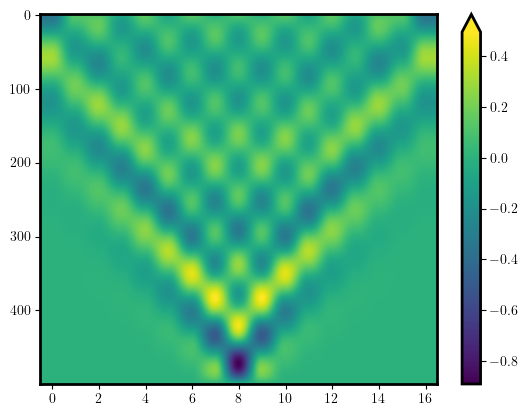

In [9]:
# Plot density dynamics
fig=plt.imshow(n_t[::-1],aspect = 'auto',interpolation=None)
plt.colorbar(fig, orientation = 'vertical',extend='max')
plt.show()
plt.close()

In [11]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(n_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))

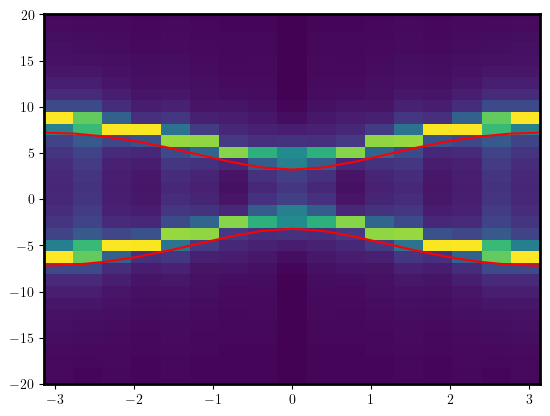

In [18]:
# Compute the exact result for the spectrum for plotting purposes
spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,L)
for i in range(L):
    spectrum[i] = 2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# Plot 2D Fourier transform
plt.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J))
plt.plot(krange,spectrum,'r-')
plt.plot(krange,-1*spectrum,'r-')
plt.ylim(-20,20)
plt.show()
plt.close()

# Use of pumping as an excitation insted of Quench to excite the system

In [188]:
##### define model parameters #####
L=17#17 # system size
J=-1.0 # spin interaction
h=-3#0.9045 # longitudinal field

##### define periodic drive #####
Omega=2.5 # drive frequency
phi = np.pi/4 ## Angle of rotation
x_proj = np.cos(phi)
y_proj = np.cos(phi)
z_proj = np.sin(phi)
def drive_x(t,Omega):
	return np.cos(Omega*t)

def drive_y(t,Omega):
    return np.sin(Omega*t)

drive_x_args=[Omega]
drive_y_args=[Omega]


##### construct basis in the 0-total momentum and +1-parity sector
#basis=spin_basis_1d(L=L,a=1,kblock=0,pblock=1)
basis = spin_basis_general(L,pauli=-1)
# define PBC site-coupling lists for operators
x_field=[[x_proj,i] for i in range(L)]
y_field=[[y_proj,i] for i in range(L)]

# x_field=[[x_proj,0] ]
# y_field=[[y_proj,0] ]

z_field=[[h,i] for i in range(L)]
#J_nn=[[J,i,(i+1)%L] for i in range(L)] # PBC
J_nn=[[J,i,i+1] for i in range(L-1)] # NPBC
# static and dynamic lists
static=[["xx",J_nn],["z",z_field]]

dynamic=[["x",x_field,drive_x,drive_x_args],["y",y_field,drive_y,drive_y_args]]
###### construct Hamiltonian
H = hamiltonian(static,dynamic,static_fmt="dia",dtype=np.complex128,basis=basis)

Hermiticity check passed!
Symmetry checks passed!


In [189]:
## Find the eigenvalue
E,V = H.eigsh(time=0.0,k=1,which='SA') 
psi =V[:,0]
print('state:',psi,' size:',len(psi))

state: [-2.53585536e-01-6.26095311e-01j  3.96508711e-02+9.78968475e-02j
  4.74216489e-02+1.17082672e-01j ... -1.30562277e-08-3.22354465e-08j
 -2.62974217e-08-6.49275693e-08j  9.12244723e-09+2.25230566e-08j]  size: 131072


In [190]:
### Evolution of the state and the observable 
times = np.arange(0.0,5.0,0.1)#np.linspace(0.0,,150,endpoint=True)
#si1_t = H.expm(psi1,a=-1j,start=times[0],stop=times[-1],num=len(times) )#,block_diag=True)
psi_t = H.evolve(psi,times[0],times,verbose=True)

evolved to time 0.0, norm of state(s) 0.9999999999999993
evolved to time 0.1, norm of state(s) 0.9999999378628457
evolved to time 0.2, norm of state(s) 0.9999998748701824
evolved to time 0.30000000000000004, norm of state(s) 0.9999998124882843
evolved to time 0.4, norm of state(s) 0.999999747514746
evolved to time 0.5, norm of state(s) 0.9999996776148806
evolved to time 0.6000000000000001, norm of state(s) 0.9999996018483821
evolved to time 0.7000000000000001, norm of state(s) 0.9999995191231085
evolved to time 0.8, norm of state(s) 0.9999994386555301
evolved to time 0.9, norm of state(s) 0.9999993601330506
evolved to time 1.0, norm of state(s) 0.9999992846708716
evolved to time 1.1, norm of state(s) 0.9999992133322858
evolved to time 1.2000000000000002, norm of state(s) 0.9999991437437444
evolved to time 1.3, norm of state(s) 0.9999990767455889
evolved to time 1.4000000000000001, norm of state(s) 0.9999990113127243
evolved to time 1.5, norm of state(s) 0.9999989472548177
evolved to ti

In [191]:
sigma_y_list = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(L)]
# Time evolution of observables
sigma_y_t = np.vstack([n.expt_value(psi_t).real for n in sigma_y_list]).T

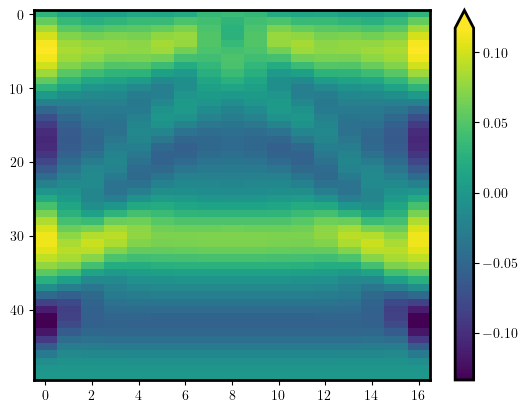

In [192]:
# Plot density dynamics
fig=plt.imshow(sigma_y_t[::-1],aspect = 'auto',interpolation=None)
plt.colorbar(fig, orientation = 'vertical',extend='max')
plt.show()
plt.close()

In [193]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(sigma_y_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))

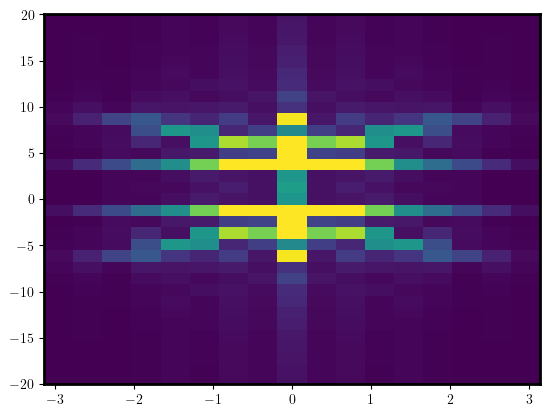

In [196]:
# Compute the exact result for the spectrum for plotting purposes
spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,L)
for i in range(L):
    spectrum[i] = 2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# Plot 2D Fourier transform
plt.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmax=1e-1)
#plt.plot(krange,spectrum,'r-')
#plt.plot(krange,-1*spectrum,'r-')
plt.ylim(-20,20)
plt.show()
plt.close()

In [197]:
## Once the system is in the stationary regime we turn off the field 
times = np.arange(0.0,5,0.1)#np.linspace(0.0,,150,endpoint=True)
psi_new= psi_t[:,-1]#psi_t[-1]

J_xx=[[J,i,(i+1)%L] for i in range(L)] # PBC
# Quench operator 
J_z = [ [h,i] for i in range(L) ]
# compute the hamiltonian
static= [["xx",J_xx], ["z",J_z]]
dynamics = []
H_1 = hamiltonian(static,dynamics,basis=basis,dtype=np.complex128, **no_checks)

psi1_t = H_1.evolve(psi_new,times[0],times,verbose=True)

evolved to time 0.0, norm of state(s) 0.9999964935180583
evolved to time 0.1, norm of state(s) 0.9999964287587303
evolved to time 0.2, norm of state(s) 0.9999963532724445
evolved to time 0.30000000000000004, norm of state(s) 0.999996275340351
evolved to time 0.4, norm of state(s) 0.9999961974097131
evolved to time 0.5, norm of state(s) 0.9999961212702966
evolved to time 0.6000000000000001, norm of state(s) 0.999996043680941
evolved to time 0.7000000000000001, norm of state(s) 0.999995967101092
evolved to time 0.8, norm of state(s) 0.9999958921327717
evolved to time 0.9, norm of state(s) 0.9999958147676005
evolved to time 1.0, norm of state(s) 0.9999957379522537
evolved to time 1.1, norm of state(s) 0.9999956616912737
evolved to time 1.2000000000000002, norm of state(s) 0.9999955829420795
evolved to time 1.3, norm of state(s) 0.9999955057424573
evolved to time 1.4000000000000001, norm of state(s) 0.9999954300535449
evolved to time 1.5, norm of state(s) 0.9999953524699232
evolved to time

In [198]:
sigma1_y_list = [hamiltonian([["y",[[1.0,i]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(L)]
# Time evolution of observables
sigma1_y_t = np.vstack([n.expt_value(psi1_t).real for n in sigma1_y_list]).T

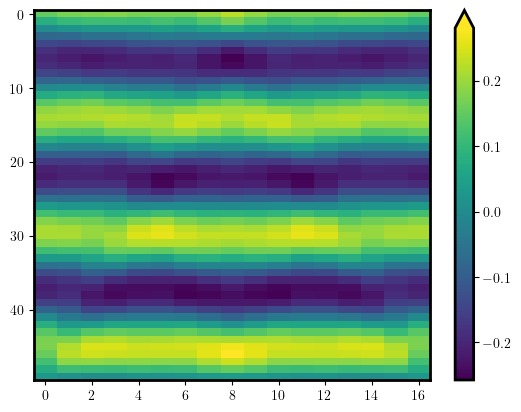

In [199]:
# Plot density dynamics
fig=plt.imshow(sigma1_y_t[::-1],aspect = 'auto',interpolation=None)
plt.colorbar(fig, orientation = 'vertical',extend='max')
#plt.ylim(200,0)
plt.show()
plt.close()

In [200]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(sigma1_y_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))

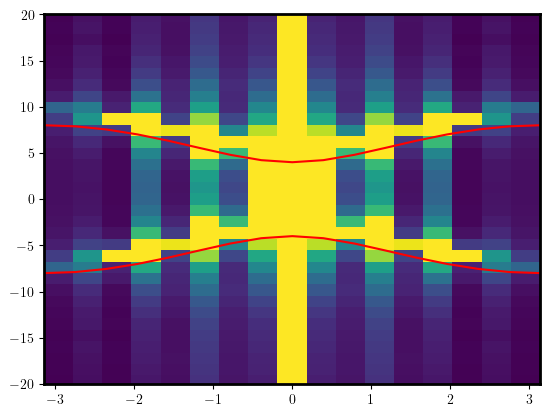

In [205]:
# Compute the exact result for the spectrum for plotting purposes
spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,L)
for i in range(L):
    spectrum[i] = 2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# Plot 2D Fourier transform
plt.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmax=1e-2)
plt.plot(krange,spectrum,'r-')
plt.plot(krange,-1*spectrum,'r-')
plt.ylim(-20,20)
plt.show()
plt.close()

In [184]:
## Correlation in y 
corr1_y_list = [hamiltonian([["yy",[[1.0,i,L//2]]]],[],basis=basis,dtype=np.complex128,**no_checks) for i in range(L)]
# Time evolution of observables
corr1_y_t = np.vstack([n.expt_value(psi1_t).real for n in corr1_y_list]).T

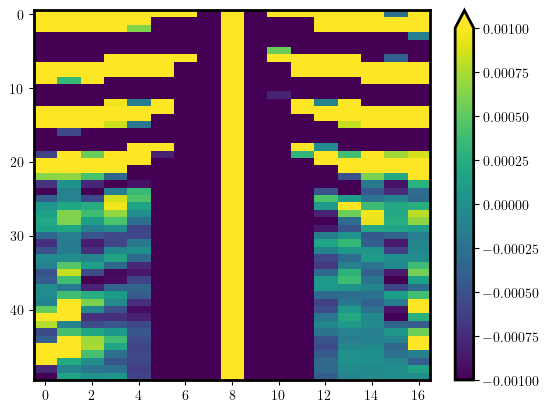

In [185]:
# Plot density dynamics
fig=plt.imshow(corr1_y_t[::-1]/np.max(corr1_y_t),aspect = 'auto',interpolation=None,vmin=-1e-3,vmax=1e-3)
plt.colorbar(fig, orientation = 'vertical',extend='max')
#plt.ylim(200,0)
plt.show()
plt.close()

In [186]:
from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(corr1_y_t, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
data = np.abs(ft)/np.max(np.abs(ft))

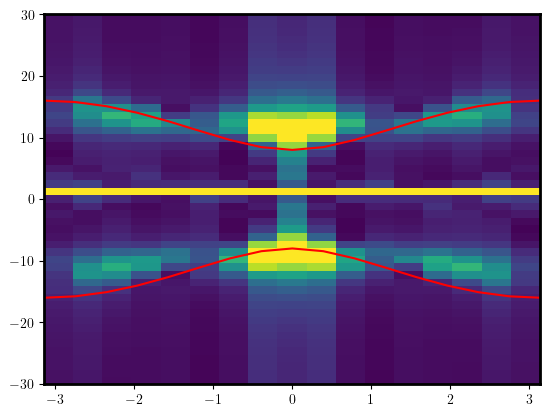

In [187]:
# Compute the exact result for the spectrum for plotting purposes
spectrum = np.zeros(L)
krange = np.linspace(-np.pi,np.pi,L)
for i in range(L):
    spectrum[i] = 2*2*np.sqrt(h**2+J**2-2*h*J*np.cos(krange[i]))

# Plot 2D Fourier transform
plt.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmin=0,vmax=1e-2)
plt.plot(krange,spectrum,'r-')
plt.plot(krange,-1*spectrum,'r-')
plt.ylim(-30,30)
plt.show()
plt.close()

In [447]:
### Example of efficient evolution using QUspin algorithms 

###########################################################################
from quspin.basis import spin_basis_1d
from quspin.operators import hamiltonian
from quspin.tools.evolution import expm_multiply_parallel
import numpy as np
import time
#
##### define data type for the simulation
dtype_real = np.float64
dtype_cmplx = np.result_type(dtype_real,np.complex64)
#
##### define model parameters #####
L=12 # system size
Jxy=np.sqrt(2.0) # xy interaction
Jzz_0=1.0 # zz interaction
hz=1.0/np.sqrt(3.0) # z external field
T=1.5 # period of switching for periodic drive
N_steps=100 # number of driving cycles to evolve for
#
##### define Hamiltonians H_0, H_1 and H_ave
# build the spin-1 basis in the zero magnetization, positive parity and zero-momentum sector
basis = spin_basis_1d(L,S="1",m=0,kblock=0,pblock=1,) 
print('total number of basis states {}.\n'.format(basis.Ns) )
# define operators with OBC using site-coupling lists
J_zz = [[Jzz_0,i,(i+1)%L] for i in range(L)] # PBC
J_xy = [[0.5*Jxy,i,(i+1)%L] for i in range(L)] # PBC
h_z=[[hz,i] for i in range(L)]
# static and dynamic lists
static_0 = [["+-",J_xy],["-+",J_xy],]
static_1 = [["zz",J_zz],["z",h_z],]
dynamic=[]
# compute the time-dependent Heisenberg Hamiltonian
H0 = hamiltonian(static_0,dynamic,basis=basis,dtype=dtype_real)
H1 = hamiltonian(static_1,dynamic,basis=basis,dtype=dtype_real)
H_ave = 0.5*(H0+H1)
#
##### compute the initial state
# calculate ground state of H_ave
E,V=H_ave.eigsh(k=1,which='SA')
psi_i=V[:,0]
#
# preallocate arrays for the observables
#
E_density=np.zeros(N_steps+1,dtype=dtype_real)
Sent_density=np.zeros(N_steps+1,dtype=dtype_real)
# compute initial values for obsrvables
E_density[0]=H_ave.expt_value(psi_i).real/L
Sent_density[0]=basis.ent_entropy(psi_i,sub_sys_A=range(L//2),density=True)['Sent_A']
#
##### compute the time evolution using expm_multiply_parallel
#
# construct piece-wise constant unitaries
expH0 = expm_multiply_parallel(H0.tocsr(),a=-1j*0.5*T,dtype=dtype_cmplx)
expH1 = expm_multiply_parallel(H1.tocsr(),a=-1j*0.5*T,dtype=dtype_cmplx) 
#
# auxiliary array for memory efficiency
psi=psi_i.copy().astype(np.complex128)
work_array=np.zeros((2*len(psi),), dtype=psi.dtype) # twice as long because complex-valued
#
# loop ober the time steps
for j in range(N_steps):
	#
	# apply to state psi and update psi in-place
	expH0.dot(psi,work_array=work_array,overwrite_v=True) 
	expH1.dot(psi,work_array=work_array,overwrite_v=True)
	# measure 'oservables'
	E_density[j+1]=H_ave.expt_value(psi).real/L
	Sent_density[j+1]=basis.ent_entropy(psi,sub_sys_A=range(L//2),density=True)['Sent_A']
	#
	print("finished evolving {0:d} step".format(j))
#
# compute Page-corrected entanglement entropy value
m=basis.sps**(L//2)
n=basis.sps**L
s_page = (np.log(m) - m/(2.0*n) ) / (L//2) 
#
#
##### Plot data
#
import matplotlib.pyplot as plt # plotting library
#

#plt.show()

total number of basis states 3179.

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
finished evolving 0 step
finished evolving 1 step
finished evolving 2 step
finished evolving 3 step
finished evolving 4 step
finished evolving 5 step
finished evolving 6 step
finished evolving 7 step
finished evolving 8 step
finished evolving 9 step
finished evolving 10 step
finished evolving 11 step
finished evolving 12 step
finished evolving 13 step
finished evolving 14 step
finished evolving 15 step
finished evolving 16 step
finished evolving 17 step
finished evolving 18 step
finished evolving 19 step
finished evolving 20 step
finished evolving 21 step
finished evolving 22 step
finished evolving 23 step
finished evolving 24 step
finished evolving 25 step
finished evolving 26 step
finished evolving 27 step
finished evolving 28 step
finished evolving 29 step
finished evolving 30 s

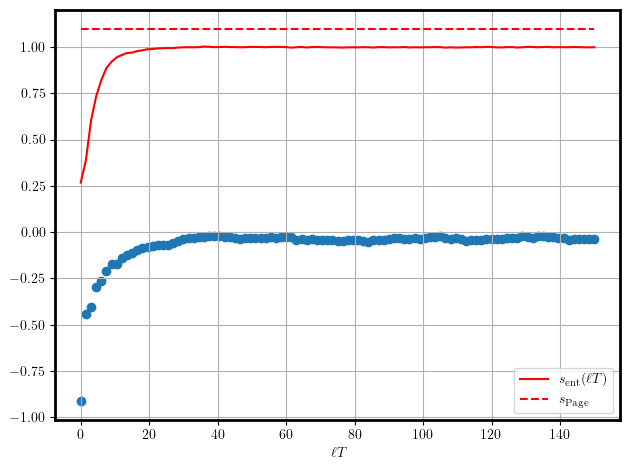

In [449]:
times=T*np.arange(N_steps+1)
#
plt.scatter(times, E_density)#, '-b', label='$\\mathcal{E}_\\mathrm{ave}(\\ell T)$')
plt.plot(times, Sent_density, '-r', label='$s_\\mathrm{ent}(\\ell T)$')
plt.plot(times, s_page*np.ones_like(times) ,'--r', label='$s_\\mathrm{Page}$')
plt.xlabel('$\\ell T$')
#plt.xlim(-T,T*(N_steps+1))
plt.legend()
plt.grid()
plt.tight_layout()
#

In [546]:
#E_density

## Distribution of energy

In [408]:
import matplotlib.pyplot as plt
# tot = 80
# plt.scatter(np.arange(0,tot),np.sort(E_Sl)[0:tot], s=1.5,color='black')
# plt.scatter(np.arange(0,tot),np.sort(E_Fe)[0:tot], s=1.5,color='red')
# plt.scatter(np.arange(0,tot),np.sort(E_Af)[0:tot], s=1.5,color='blue')

(array([0.02569502, 0.00899326, 0.02697977, 0.0578138 , 0.02312552,
        0.06166805, 0.04625104, 0.05395955, 0.04625104, 0.07708507,
        0.04625104, 0.06809181, 0.06166805, 0.09121733, 0.03982728,
        0.06680706, 0.05395955, 0.07066131, 0.06295281, 0.03597303,
        0.04496629, 0.03725778, 0.04625104, 0.03340353, 0.01541701,
        0.02697977, 0.01798652, 0.02055602, 0.005139  , 0.01156276]),
 array([-11.        , -10.22163913,  -9.44327827,  -8.6649174 ,
         -7.88655654,  -7.10819567,  -6.3298348 ,  -5.55147394,
         -4.77311307,  -3.99475221,  -3.21639134,  -2.43803047,
         -1.65966961,  -0.88130874,  -0.10294788,   0.67541299,
          1.45377386,   2.23213472,   3.01049559,   3.78885645,
          4.56721732,   5.34557818,   6.12393905,   6.90229992,
          7.68066078,   8.45902165,   9.23738251,  10.01574338,
         10.79410425,  11.57246511,  12.35082598]),
 <BarContainer object of 30 artists>)

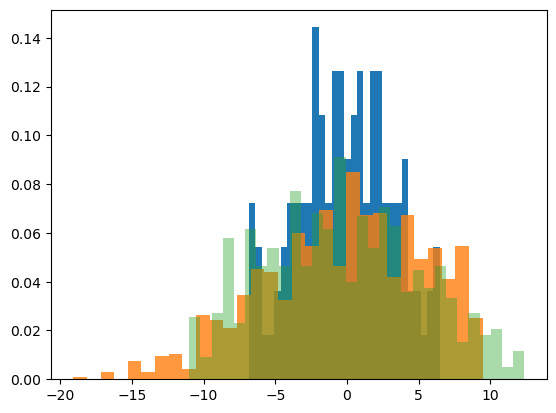

In [54]:
tot = 1000
plt.hist(np.sort(E_Sl)[0:tot],30,density=1)
plt.hist(np.sort(E_Af)[0:tot],30,density=1,alpha=0.8)
plt.hist(np.sort(E_Fe)[0:tot],30,density=1,alpha=0.4)

(0.0, 0.5)

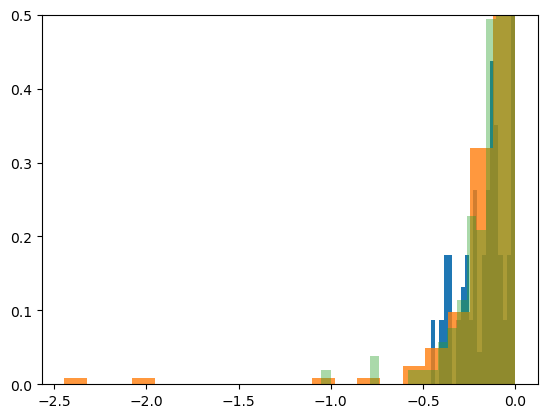

In [63]:
tot = 1000
plt.hist(np.sort(E_Sl)[0:tot]-np.sort(E_Sl)[1:tot+1],20,density=1)
plt.hist(np.sort(E_Af)[0:tot]-np.sort(E_Af)[1:tot+1],20,density=1,alpha=0.8)
plt.hist(np.sort(E_Fe)[0:tot]-np.sort(E_Fe)[1:tot+1],20,density=1,alpha=0.4)
plt.ylim([0,0.5])

In [ ]:


# def evolve(H_static, H_dynamic, psi, dt, method='diag', time_dep=0):
#     """a function to evolve the wave function in time
#     if time independet, we return Ut and should be called outside
#     the loop
#     """
#     size = H_static.shape[0]
#     if method == 'gpu' or method == 'CN_gpu':
#         import pycuda.gpuarray as gpuarray
#         import pycuda.autoinit
# #         from skcuda import linalg
# #         from skcuda import misc
# #         linalg.init()
#     if not time_dep:
#         if method=='expm': 
#             Ut = la.expm(-1j*H_static.toarray()*dt/HBAR)
#             return Ut
#         elif method=='eig_vec':
#             w,v = la.eigh(H_static.toarray())
#             Ut = np.asarray([np.exp(-1j*w[i]*dt) for i in range(size)])
#             return Ut
#         elif method=='CN':
# #             Ut = sla.inv((eye(size) + 1j*dt*H_static/(2*HBAR)).tocsc()) @ \
# #                        (eye(size) - 1j*dt*H_static/(2*HBAR))
#             Ut = la.inv(( np.eye(size) + 1j*dt*H_static.toarray()/(2*HBAR))) @ \
#                        ( np.eye(size) - 1j*dt*H_static.toarray()/(2*HBAR))
#             return Ut@psi
            
#         elif method=='CN_spilu':
#             B = sla.spilu(eye(size) + 1j*dt*H_static/(2*HBAR))
#             return B
    
#         elif method=='CN_gpu':
#             mat      = (eye(size) + 1j*dt*H_static/(2*HBAR))
#             a_gpu    = gpuarray.to_gpu(mat.toarray()) 
#             ainv_gpu = linalg.inv(a_gpu, overwrite=True)
#             mat_inv  = ainv_gpu.get()
#             Ut       = mat_inv @ (eye(size) - 1j*dt*H_static/(2*HBAR))
#             return Ut
#     else: 
#         if method=='expm': 
#             Ht = H_static + H_dynamic
#             Ut = la.expm(-1j*Ht.toarray()*dt/HBAR)
#             psi_new = Ut @ psi
#             return psi

#         elif method=='CN':
#             Ht = H_static + H_dynamic
#             Ut = sla.inv(eye(size) + 1j*dt*Ht/(2*HBAR)) @ \
#                         (eye(size) - 1j*dt*Ht/(2*HBAR))
#             psi = Ut @ psi
#             return psi
            
#         if method=='eig_vec':
#             Ht = H_static + H_dynamic
#             w, v = la.eigh(Ht.toarray())
#             Ut = np.asarray([np.exp(-1j*w[i]*dt) for i in range(2)])
#             cn = [v[:,i].conj() @ psi for i in range(2)]
#             psi = np.sum([cn[i] * (Ut[i] * v[:,i]) for i in range(2)], axis=0)
#             return psi

#         elif method=='CN_gpu':
#             Ht = H_static + H_dynamic
#             mat      = (eye(size) + 1j*dt*Ht/(2*HBAR))
#             a_gpu    = gpuarray.to_gpu(mat.toarray()) 
#             ainv_gpu = linalg.inv(a_gpu, overwrite=True)
#             mat_inv  = ainv_gpu.get()
#             Ut       = mat_inv @ (eye(size) - 1j*dt*Ht/(2*HBAR))
#             psi = Ut @ psi
#             return psi


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


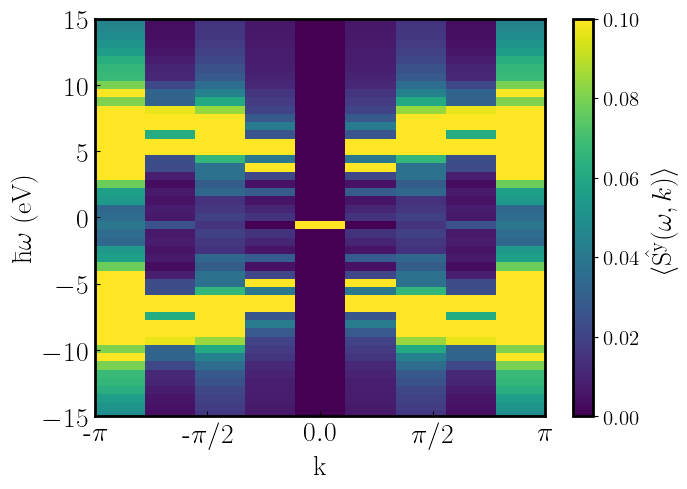

In [182]:
# Compute the exact result for the spectrum for plotting purposes
import matplotlib.colors as mcolors
fig,axes=plt.subplots(1,1,figsize=(7,5))
fs=20
# spectrum = np.zeros(L)fig,axes=plt.subplots(1,1,figsize=(6,4))
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))
krange = np.linspace(-np.pi,np.pi,Lx)
c= axes.imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmin=0,vmax=.10)
#pcm = axes.pcolormesh(data[::-1])
#fig.colorbar(pcm, ax=axes)
cbar = fig.colorbar(c, ax=axes, orientation='vertical')
cbar.set_label(r'$\langle\hat\mathrm{ S^y}(\omega,k) \rangle$',fontsize=fs)
cbar.ax.tick_params(labelsize=fs-5)
axes.set_xlabel(r'$\mathrm{k}$',fontsize=fs)
axes.set_ylabel(r'$\mathrm{\hbar \omega\ (eV)}$',fontsize=fs)
#c = axes.pcolormesh(kx, ky, Z_fft_magnitude.T, cmap=cmap, shading='auto', vmin=0., vmax=1e-2)
#fig.colorbar(ax=axes)
#plt.colorbar(fig,axes, orientation = 'vertical',extend='max')
axes.set_ylim(-15,15)


axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axes.tick_params(axis='both', which='major', labelsize=fs,direction='in')
axes.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)


axes.set_xticks(np.linspace(-np.pi,np.pi,5))
labels = [r'-$\pi$', r'-$\pi/2$', r'$0.0$' , r'$\pi/2$', r'$\pi$']
axes.set_xticklabels(labels)


# J=1
# K=0.0
# ks=np.linspace(0.0,2*np.pi,100)
# w1 = lambda q: -(2*J+K)/2*(1+np.cos(q/2))
# w2 =  lambda q: -(2*J+K)/2*(1-np.cos(q/2))

# axes.plot(ks-np.pi,w1(ks))
# axes.plot(ks-np.pi,w2(ks))

#c = axes.pcolormesh(kx, ky, Z_fft_magnitude.T, cmap=cmap, shading='auto', vmin=0., vmax=1e-2)
#fig.colorbar(ax=axes)
#plt.colorbar(fig,axes, orientation = 'vertical',extend='max')
# plt.plot(krange,spectrum,'r-')
# plt.plot(krange,-1*spectrum,'r-')
#axes.set_ylim(-0.5,15)
#plt.show()
plt.tight_layout()
plt.savefig('spectra.pdf')

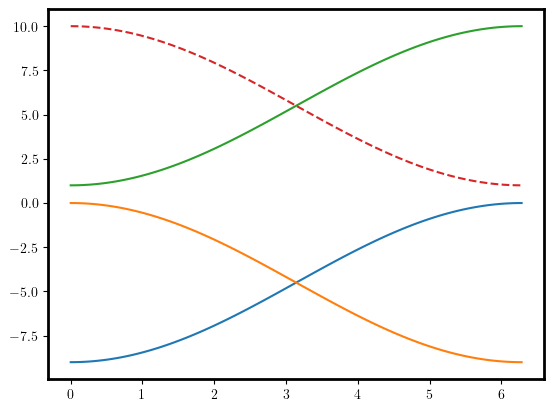

In [174]:
J=2
K=5
ks=np.linspace(0.0,2*np.pi,100)
w1 = lambda q: -(2*J+K)/2*(1+np.cos(q/2))
w2 =  lambda q: -(2*J+K)/2*(1-np.cos(q/2))
w3=lambda q: -(2*J+K)/2*(1+np.cos(q/2)) + 2*np.abs(K)
w4=lambda q: -(2*J+K)/2*(1-np.cos(q/2)) + 2*np.abs(K)
plt.plot(ks,w1(ks))
plt.plot(ks,w2(ks))
plt.plot(ks,w3(ks))
plt.plot(ks,w4(ks),ls='--')

## Figure preparation 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


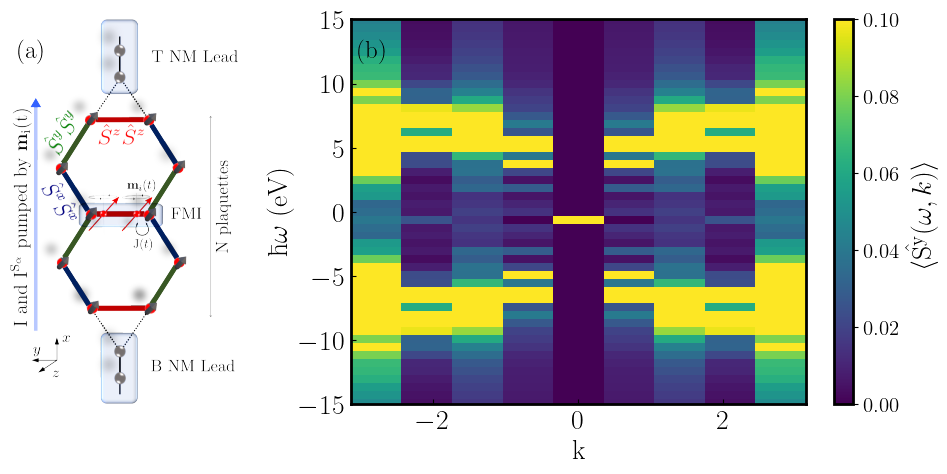

In [138]:
from skimage import io
# Compute the exact result for the spectrum for plotting purposes
import matplotlib.colors as mcolors
fig,axes=plt.subplots(1,2,figsize=(12,5))
axs=axes.reshape(2)
fs=20
# spectrum = np.zeros(L)fig,axes=plt.subplots(1,1,figsize=(6,4))
#axes.set_xlim([0.,0.1])
#axes.set_ylim([-0.01,0.6])
#axes.axvline([0.04],color='black',ls='--')
#axes.set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/2))
#labels = [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'] ;
#axes.set_xticklabels(labels)
plt.legend(frameon = False, fontsize = fs-5, loc= (0.7,  0.4))
krange = np.linspace(-np.pi,np.pi,Lx)
c= axs[1].imshow(data[::-1], aspect = 'auto', interpolation = 'none' , extent = (-np.pi, np.pi, max(energies)/J, min(energies)/J),vmin=0,vmax=.10)
#pcm = axes.pcolormesh(data[::-1])
#fig.colorbar(pcm, ax=axes)
cbar = fig.colorbar(c, ax=axs[1], orientation='vertical')
cbar.set_label(r'$\langle\hat\mathrm{ S^y}(\omega,k) \rangle$',fontsize=fs)
cbar.ax.tick_params(labelsize=fs-5)
axs[1].set_xlabel(r'$\mathrm{k}$',fontsize=fs)
axs[1].set_ylabel(r'$\mathrm{\hbar \omega\ (eV)}$',fontsize=fs)
#c = axes.pcolormesh(kx, ky, Z_fft_magnitude.T, cmap=cmap, shading='auto', vmin=0., vmax=1e-2)
#fig.colorbar(ax=axes)
#plt.colorbar(fig,axes, orientation = 'vertical',extend='max')
axs[1].set_ylim(-15,15)


axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[1].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[1].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

# Load and display the PDF in the second axis (right side)
pdf_file = "setup_pump.png"

img = io.imread(pdf_file)
#axs[0].imshow(image)
axs[0].imshow(img)
axs[0].axis('off')
fig.subplots_adjust(left=0.05, right=0.95, wspace=-0.1)  # Adjust the width space between subplots

index=[r'$\rm{(a)}$',r'$\rm{(b)}$',r'$\rm{(c)}$',r'$\rm{(d)}$']#['(a)','(b)','(c)','(d)']


axs[0].text(x=0.1, y=0.9, s=r'$\rm{(a)}$',fontsize=fs-2,ha='center', transform=axes[0].transAxes)

axs[1].text(x=0.05, y=0.9, s=r'$\rm{(b)}$',fontsize=fs-2,ha='center', transform=axes[1].transAxes)
#plt.tight_layout()
#plt.show()
plt.savefig('fig_setup.pdf')


In [163]:
afm_theta0=np.loadtxt('space_time_AFM_theta0.txt')
fm_thetapi=np.loadtxt('space_time_FM_thetapi.txt')
afmqsl_thetapidiv2=np.loadtxt('space_time_AFMQSL_thetapidiv2.txt')

In [111]:
#afm_theta0[::-1]

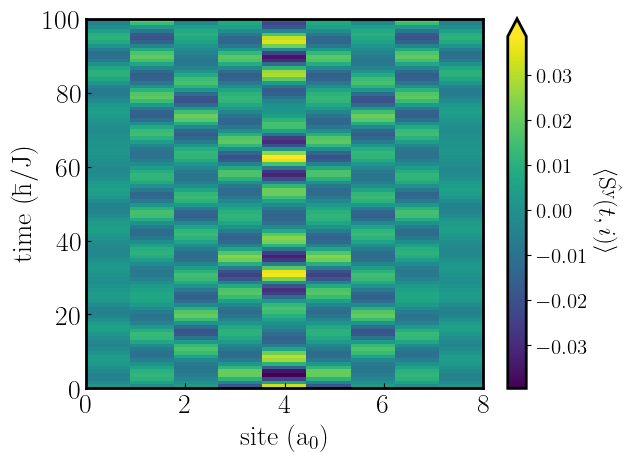

In [165]:
from matplotlib.ticker import MaxNLocator
fs=20
fig, ax = plt.subplots()
cax=ax.imshow(afm_theta0[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100))

ax.tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

ax.tick_params(axis='both', which='major', labelsize=fs,direction='in')
ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=ax, orientation = 'vertical',extend='max')
c.ax.tick_params(labelsize=fs-5) 

# ax.set_xlim(0, 9)  # Ajusta según necesites
# ax.set_ylim(0, 9)  # Ajusta según necesites
# ax.set_xlim(0, 100)  # Ajusta según necesites
# ax.set_ylim(0, 9)  # Ajusta según necesites
#plt.ylim(200,0)
c.set_label(label=r'$\langle\hat\mathrm{ S^y}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=8)  # Cambia '5' al número de ticks que desees
c.update_ticks()
#c.ax.xaxis.set_label_position('top')
plt.xlabel(r'$\mathrm{site\ (a_0)}$',fontsize=fs)
plt.ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)
#plt.legend(fontsize=fs)
plt.show()

In [275]:
afm_theta0=np.loadtxt('space_time_AFM_theta0.txt')
fm_thetapi=np.loadtxt('space_time_FM_thetapi.txt')
afmqsl_thetapidiv2=np.loadtxt('space_time_AFMQSL_thetapidiv2.txt')

from scipy import fftpack
steps = len(times)
dt = times[1] - times[0]
# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(afm_theta0, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
afm_theta0_spec = np.abs(ft)/np.max(np.abs(ft))

# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(fm_thetapi, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
fm_thetapi_spe = np.abs(ft)/np.max(np.abs(ft))

# Compute Fourier transform of observables, and lists of momenta/energies
ft = np.abs(np.fft.fft2(afmqsl_thetapidiv2, norm=None))
ft = np.fft.fftshift(ft)
energies = fftpack.fftshift(fftpack.fftfreq(steps) * (2.*np.pi/dt))
# Normalise FT
afmqsl_thetapidiv2_spe = np.abs(ft)/np.max(np.abs(ft))


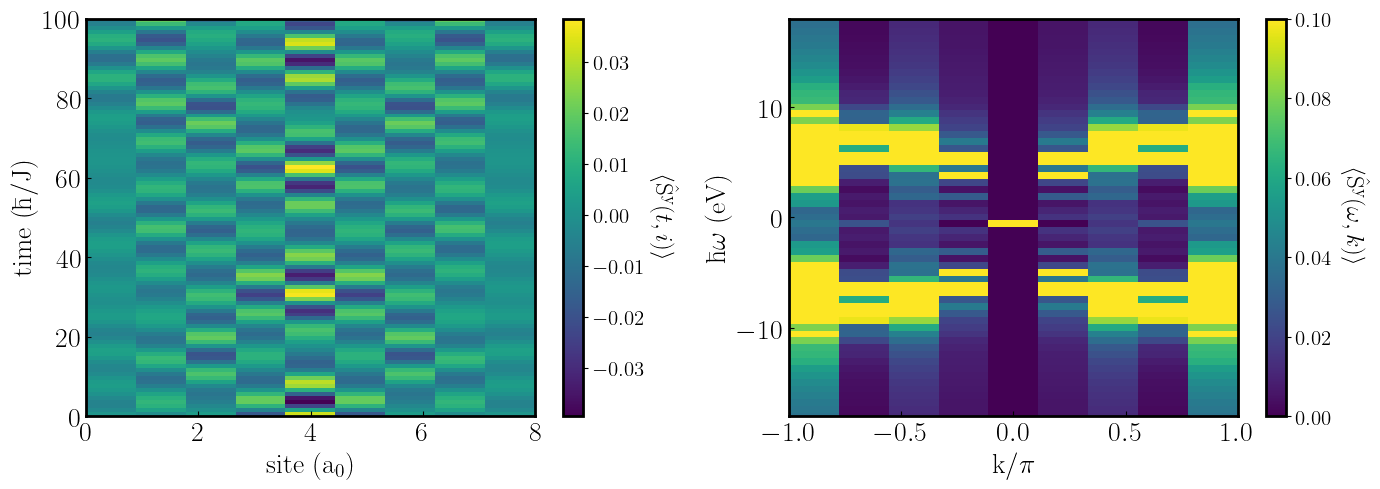

In [220]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axs=axes.reshape(2)

cax=axs[0].imshow(afm_theta0[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100))

axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[0], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=8)  # Cambia '5' al número de ticks que desees
c.update_ticks()
#c.ax.xaxis.set_label_position('top')
axs[0].set_xlabel(r'$\mathrm{site\ (a_0)}$',fontsize=fs)
axs[0].set_ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)



krange = np.linspace(-1,1,Lx)
c= axs[1].imshow(afm_theta0_spec[::-1], aspect = 'auto', interpolation = 'none' , extent = (-1, 1, max(energies)/J, min(energies)/J),vmin=0,vmax=.10)
#pcm = axes.pcolormesh(data[::-1])
#fig.colorbar(pcm, ax=axes)
cbar = fig.colorbar(c, ax=axs[1], orientation='vertical')
cbar.set_label(r'$\langle\hat\mathrm{ S}^{\rm{y}}(\omega,k) \rangle$',fontsize=fs-2,rotation=270,labelpad=28)
cbar.ax.tick_params(labelsize=fs-5)
axs[1].set_xlabel(r'$\mathrm{k/\pi}$',fontsize=fs)
axs[1].set_ylabel(r'$\mathrm{\hbar \omega\ (eV)}$',fontsize=fs)

cbar.locator = MaxNLocator(nbins=5)  # Cambia '5' al número de ticks que desees
cbar.update_ticks()
#c = axes.pcolormesh(kx, ky, Z_fft_magnitude.T, cmap=cmap, shading='auto', vmin=0., vmax=1e-2)
#fig.colorbar(ax=axes)
#plt.colorbar(fig,axes, orientation = 'vertical',extend='max')
axs[1].set_ylim(-15,15)

axs[1].set_ylim([-18,18])
axs[1].tick_params(axis='both', which='major', labelsize=fs,direction='in')
#axs[1].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)
# labels = ['$-\\pi$', '$-\\frac{\\pi}{2}$', '$0$', '$\\frac{\\pi}{2}$', '$\\pi$']
# axs[1].set_xticklabels(labels)
#axs[1].xaxis.set_major_locator(MaxNLocator(9))
plt.tight_layout()

#plt.legend(fontsize=fs)
plt.savefig('fig_for_setup.png')

plt.show()

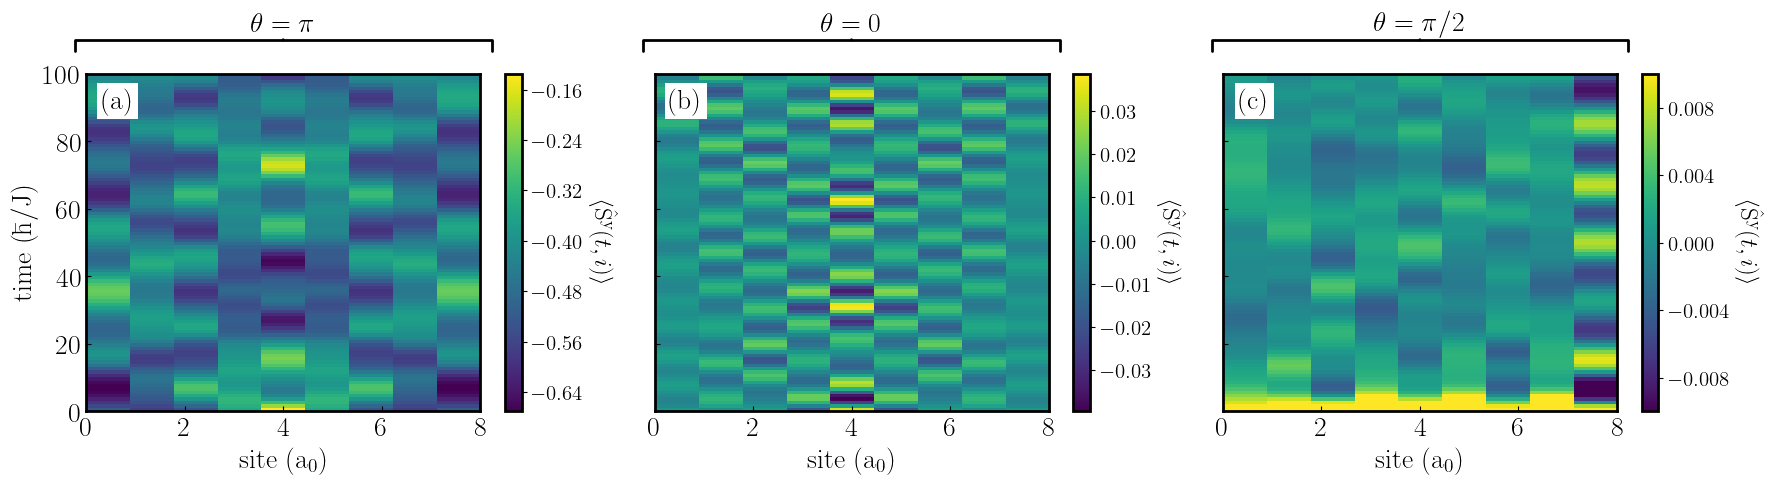

In [266]:
fig, axes = plt.subplots(1,3,figsize=(18,5),sharey=True)
axs=axes.reshape(3)

cax=axs[0].imshow(fm_thetapi[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100))

axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[0], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=8)  # Cambia '5' al número de ticks que desees
c.update_ticks()
#c.ax.xaxis.set_label_position('top')
axs[0].set_xlabel(r'$\mathrm{site\ (a_0)}$',fontsize=fs)
axs[0].set_ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)


########################################

cax=axs[1].imshow(afm_theta0[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100))

axs[1].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[1].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[1].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[1], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=8)  # Cambia '5' al número de ticks que desees
c.update_ticks()
# #c.ax.xaxis.set_label_position('top')
axs[1].set_xlabel(r'$\mathrm{site\ (a_0)}$',fontsize=fs)
#axs[1].set_ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)

#################################################


cax=axs[2].imshow(afmqsl_thetapidiv2[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100),vmin=-0.01,vmax=0.01)

axs[2].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[2].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[2].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[2], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=5)  # Cambia '5' al número de ticks que desees
c.update_ticks()
#c.ax.xaxis.set_label_position('top')
axs[2].set_xlabel(r'$\mathrm{site\ (a_0)}$',fontsize=fs)
#axs[2].set_ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)

# Add horizontal brackets
axs[0].annotate(r'$\mathrm{\theta=\pi}$', xy=(0.5, 1.1), xytext=(0.5, 1.11), xycoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.4', lw=2.0))

axs[1].annotate(r'$\mathrm{\theta=0}$', xy=(0.5, 1.1), xytext=(0.5, 1.11), xycoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.4', lw=2.0))

axs[2].annotate(r'$\mathrm{\theta=\pi/2}$', xy=(0.5, 1.1), xytext=(0.5, 1.11), xycoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.4', lw=2.0))
#axs[1].xaxis.set_major_locator(MaxNLocator(9))

fig.text(0.08, 0.92, r'$\rm{(a)}$', va='center', ha='center', rotation='horizontal', fontsize=fs, transform=axs[0].transAxes,
         bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
fig.text(0.08, 0.92, r'$\rm{(b)}$', va='center', ha='center', rotation='horizontal', fontsize=fs, transform=axs[1].transAxes,
         bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
fig.text(0.08, 0.92,r'$\rm{(c)}$', va='center', ha='center', rotation='horizontal', fontsize=fs, transform=axs[2].transAxes,
         bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
plt.tight_layout()



plt.savefig('pumping_for_different_phases.pdf')


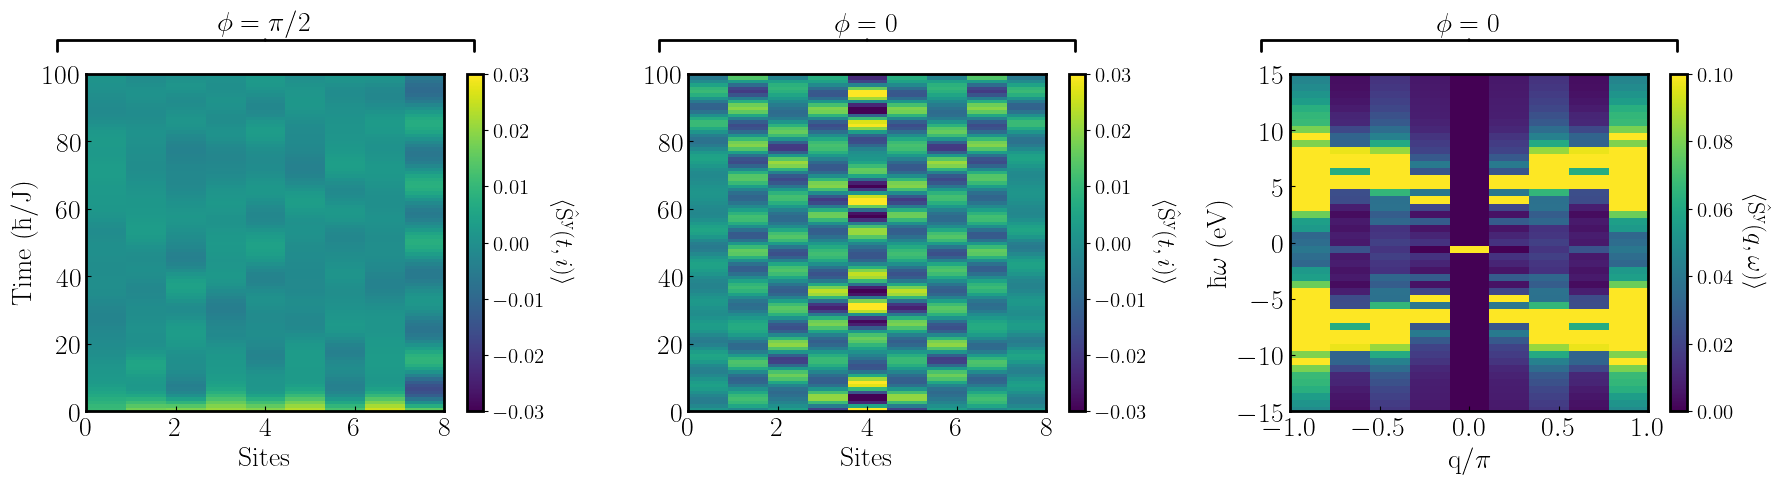

In [340]:
fig, axes = plt.subplots(1,3,figsize=(18,5))
axs=axes.reshape(3)

cax=axs[0].imshow(afmqsl_thetapidiv2[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100),vmin=-0.03,vmax=0.03)

axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[0].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[0].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[0], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=7)  # Cambia '5' al número de ticks que desees
c.update_ticks()
#c.ax.xaxis.set_label_position('top')
axs[0].set_xlabel(r'$\mathrm{Sites}$',fontsize=fs)
axs[0].set_ylabel(r'$\mathrm{Time\ (\hbar/J)}$',fontsize=fs)
#axs[0].set_xticks([0.5,1.25,2.25,3,4.5,5.5,6.5,7.5],[0, 1,2,3,4,5,6,7])
#c.locator = MaxNLocator(nbins=5) 

########################################

cax=axs[1].imshow(afm_theta0[::-1],aspect = 'auto',interpolation=None, extent = (0, 8, 0,100),vmin=-0.03,vmax=0.03)

axs[1].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[1].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[1].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[1], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=8)  # Cambia '5' al número de ticks que desees
c.update_ticks()
# #c.ax.xaxis.set_label_position('top')
axs[1].set_xlabel(r'$\mathrm{Sites}$',fontsize=fs)
#axs[1].set_ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)
c.locator = MaxNLocator(nbins=7) 
#################################################


cax=axs[2].imshow(afm_theta0_spec[::-1],aspect = 'auto',interpolation=None , extent = (-1, 1, max(energies)/J, min(energies)/J),vmin=0,vmax=.10)

axs[2].tick_params(axis='both', which='major', labelsize=fs,direction='in')
# ax.ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

axs[2].tick_params(axis='both', which='major', labelsize=fs,direction='in')
axs[2].ticklabel_format(axis="x", style="sci", scilimits=(-2,1), useMathText=True)

c= plt.colorbar(cax,ax=axs[2], orientation = 'vertical')#,extend='max')
c.ax.tick_params(labelsize=fs-5) 
c.set_label(label=r'$\langle\hat\mathrm{ S}^{\rm{y}}(t,i) \rangle$',fontsize=fs-2,rotation=270,labelpad=25)#,labelpad=20)
c.locator = MaxNLocator(nbins=5)  # Cambia '5' al número de ticks que desees
c.update_ticks()


c.set_label(r'$\langle\hat\mathrm{ S}^{\rm{y}}(q,\omega) \rangle$',fontsize=fs-2,rotation=270,labelpad=28)
c.ax.tick_params(labelsize=fs-5)
axs[2].set_xlabel(r'$\mathrm{q/\pi}$',fontsize=fs)
axs[2].set_ylabel(r'$\mathrm{\hbar \omega\ (eV)}$',fontsize=fs)
#c.ax.xaxis.set_label_position('top')
#axs[2].set_xlabel(r'$\mathrm{site\ (a_0)}$',fontsize=fs)
axs[2].set_ylim(-15,15)
#axs[2].set_ylabel(r'$\mathrm{time\ (\hbar/J)}$',fontsize=fs)

# Add horizontal brackets
axs[0].annotate(r'$\mathrm{\phi=\pi/2}$', xy=(0.5, 1.1), xytext=(0.5, 1.11), xycoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.4', lw=2.0))

axs[1].annotate(r'$\mathrm{\phi=0}$', xy=(0.5, 1.1), xytext=(0.5, 1.11), xycoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.4', lw=2.0))

axs[2].annotate(r'$\mathrm{\phi=0}$', xy=(0.5, 1.1), xytext=(0.5, 1.11), xycoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.4', lw=2.0))
#axs[1].xaxis.set_major_locator(MaxNLocator(9))

# fig.text(0.08, 0.92, r'$\rm{(a)}$', va='center', ha='center', rotation='horizontal', fontsize=fs, transform=axs[0].transAxes,
#          bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
# fig.text(0.08, 0.92, r'$\rm{(b)}$', va='center', ha='center', rotation='horizontal', fontsize=fs, transform=axs[1].transAxes,
#          bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
# fig.text(0.08, 0.92,r'$\rm{(c)}$', va='center', ha='center', rotation='horizontal', fontsize=fs, transform=axs[2].transAxes,
#          bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
plt.tight_layout()

plt.savefig('Spectra_from_local_op.pdf')


In [325]:
9/8

1.125